In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

### **Download Dataset**

In [2]:
import os
from functions import download_and_extract_zip

# URL of the zip file on Google Drive
url = 'https://drive.google.com/file/d/1iePsqUVQjv_fVZQzFy7pntcTUtGmb_wx/view?usp=sharing'

# Check if the 'PlantVillage' folder exists
if not os.path.exists('PlantVillage') or not os.listdir('PlantVillage'):
    download_and_extract_zip(url)

# **Training and evaluating Models**

In [70]:
import importlib
import model_fun
importlib.reload(model_fun); 

In [71]:
from model_fun import load_data, SimpleCNN, train_model, evaluate_model, load_model, plot_training_epochs_hystory, collect_misclassified_images, plot_class_statistics, plot_high_error_classes

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # Use GPU if available
num_classes = 38

Epoch 1/50: 100%|██████████| 1358/1358 [00:10<00:00, 126.03batch/s, loss=1.01] 

Epoch 1, Average Loss: 1.7233


Validation Accuracy: 72.22%
Validation Loss: 0.9042


Epoch 2/50: 100%|██████████| 1358/1358 [00:07<00:00, 178.96batch/s, loss=0.701]

Epoch 2, Average Loss: 0.8508


Validation Accuracy: 82.11%
Validation Loss: 0.5656


Epoch 3/50: 100%|██████████| 1358/1358 [00:07<00:00, 174.72batch/s, loss=0.577]

Epoch 3, Average Loss: 0.6368


Validation Accuracy: 85.40%
Validation Loss: 0.4600


Epoch 4/50: 100%|██████████| 1358/1358 [00:07<00:00, 174.39batch/s, loss=0.894] 

Epoch 4, Average Loss: 0.5195


Validation Accuracy: 89.17%
Validation Loss: 0.3436


Epoch 5/50: 100%|██████████| 1358/1358 [00:07<00:00, 172.52batch/s, loss=0.607]

Epoch 5, Average Loss: 0.4404


Validation Accuracy: 89.72%
Validation Loss: 0.3171


Epoch 6/50: 100%|██████████| 1358/1358 [00:07<00:00, 176.99batch/s, loss=0.441] 

Epoch 6, Average Loss: 0.3845


Validation Accuracy: 90.46%
Validation Loss: 0.3013


Epoch 7/50: 100%|██████████| 1358/1358 [00:07<00:00, 174.31batch/s, loss=0.242] 

Epoch 7, Average Loss: 0.3462


Validation Accuracy: 91.69%
Validation Loss: 0.2594


Epoch 8/50: 100%|██████████| 1358/1358 [00:07<00:00, 173.16batch/s, loss=0.703] 


Epoch 8, Average Loss: 0.3084
Validation Accuracy: 91.76%
Validation Loss: 0.2613


Epoch 9/50: 100%|██████████| 1358/1358 [00:07<00:00, 176.75batch/s, loss=0.847] 

Epoch 9, Average Loss: 0.2908


Validation Accuracy: 92.63%
Validation Loss: 0.2335


Epoch 10/50: 100%|██████████| 1358/1358 [00:07<00:00, 176.29batch/s, loss=0.167] 

Epoch 10, Average Loss: 0.2664


Validation Accuracy: 93.40%
Validation Loss: 0.2107


Epoch 11/50: 100%|██████████| 1358/1358 [00:07<00:00, 173.51batch/s, loss=0.0418]


Epoch 11, Average Loss: 0.2463
Validation Accuracy: 93.16%
Validation Loss: 0.2148


Epoch 12/50: 100%|██████████| 1358/1358 [00:07<00:00, 173.80batch/s, loss=0.114] 


Epoch 12, Average Loss: 0.2264
Validation Accuracy: 92.72%
Validation Loss: 0.2324


Epoch 13/50: 100%|██████████| 1358/1358 [00:07<00:00, 178.04batch/s, loss=0.359] 


Epoch 13, Average Loss: 0.2150
Validation Accuracy: 92.39%
Validation Loss: 0.2291


Epoch 14/50: 100%|██████████| 1358/1358 [00:07<00:00, 174.39batch/s, loss=0.172]  

Epoch 14, Average Loss: 0.1985


Validation Accuracy: 93.66%
Validation Loss: 0.2141


Epoch 15/50: 100%|██████████| 1358/1358 [00:07<00:00, 173.30batch/s, loss=0.473]  

Epoch 15, Average Loss: 0.1937


Validation Accuracy: 94.21%
Validation Loss: 0.1859


Epoch 16/50: 100%|██████████| 1358/1358 [00:07<00:00, 172.86batch/s, loss=0.245]  


Epoch 16, Average Loss: 0.1808
Validation Accuracy: 93.73%
Validation Loss: 0.1989


Epoch 17/50: 100%|██████████| 1358/1358 [00:07<00:00, 179.04batch/s, loss=0.42]  

Epoch 17, Average Loss: 0.1791


Validation Accuracy: 93.73%
Validation Loss: 0.2045


Epoch 18/50: 100%|██████████| 1358/1358 [00:08<00:00, 169.62batch/s, loss=0.31]   

Epoch 18, Average Loss: 0.1709


Validation Accuracy: 92.44%
Validation Loss: 0.2513


Epoch 19/50: 100%|██████████| 1358/1358 [00:07<00:00, 173.79batch/s, loss=0.204]  

Epoch 19, Average Loss: 0.1587


Validation Accuracy: 94.65%
Validation Loss: 0.1832


Epoch 20/50: 100%|██████████| 1358/1358 [00:07<00:00, 175.78batch/s, loss=0.0287] 

Epoch 20, Average Loss: 0.1519


Validation Accuracy: 94.37%
Validation Loss: 0.1981


Epoch 21/50: 100%|██████████| 1358/1358 [00:07<00:00, 175.62batch/s, loss=0.203]  

Epoch 21, Average Loss: 0.1472


Validation Accuracy: 94.04%
Validation Loss: 0.1938


Epoch 22/50: 100%|██████████| 1358/1358 [00:07<00:00, 173.41batch/s, loss=0.0187] 

Epoch 22, Average Loss: 0.1457


Validation Accuracy: 94.04%
Validation Loss: 0.2031


Epoch 23/50: 100%|██████████| 1358/1358 [00:07<00:00, 172.82batch/s, loss=0.276]  


Epoch 23, Average Loss: 0.1394
Validation Accuracy: 94.19%
Validation Loss: 0.1995


Epoch 24/50: 100%|██████████| 1358/1358 [00:07<00:00, 173.89batch/s, loss=0.0536] 


Epoch 24, Average Loss: 0.1338
Validation Accuracy: 94.89%
Validation Loss: 0.1915
Early stopping triggered after 24 epochs.


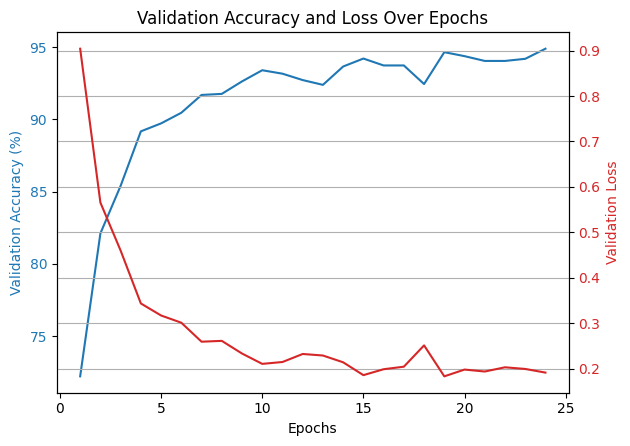

It took 3 minutes and 32 seconds to traing the model


In [72]:
image_width = 32
train_loader, val_loader, test_loader, class_names = load_data(image_width)

model = SimpleCNN(num_classes, image_width, num_layers=3, first_layer_filters=32).to(device)  # Move model to device

val_accuracies, val_losses, time_elapsed, n_epochs = train_model(model, num_classes, train_loader, val_loader, epoch = 50)

minutes = time_elapsed // 60
seconds = time_elapsed - minutes * 60

plot_training_epochs_hystory(val_accuracies, val_losses, n_epochs)

print(f"It took {int(minutes)} minutes and {int(seconds)} seconds to traing the model")

In [9]:
cm, report = evaluate_model(model, test_loader, class_names)

f1 = report['weighted avg']['f1-score']
accuracy = report['accuracy']

print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

F1 Score: 0.9580
Accuracy: 0.9579


## **Finding best hyperparameters**

In [74]:
from itertools import product

# Parametri da testare
image_sizes = [32]
layers = [2, 3, 4, 5]
first_layer_filters = [8, 16, 32, 64]

# Combinazioni di parametri
parameter_combinations = list(product(image_sizes, layers, first_layer_filters))

In [75]:
results = []  # Per salvare i risultati

for image_size, num_layers, first_layer_filters in parameter_combinations:
    
    print(f"\n\n--Testing configuration: image_size={image_size}, layers={num_layers}, first_layer_filters={first_layer_filters}")
    
    train_loader, val_loader, test_loader, class_names = load_data(image_size)

    model = SimpleCNN(num_classes, image_size, num_layers, first_layer_filters).to(device)  # Move model to device

    val_accuracies, val_losses, time_elapsed, n_epochs = train_model(model, num_classes, train_loader, val_loader, epoch = 50)

    # Valuta il modello
    cm, report = evaluate_model(model, val_loader, class_names)

    # Salva i risultati
    results.append({
        "image_size": image_size,
        "num_layers": num_layers,
        "first_layer_filters": first_layer_filters,
        "val_accuracies": val_accuracies,
        "val_losses": val_losses,
        "time_elapsed": time_elapsed,
        "n_epochs": n_epochs,
        "confusion_matrix": cm,
        "classification_report": report
    })



--Testing configuration: image_size=32, layers=2, first_layer_filters=8


Epoch 1/50: 100%|██████████| 1358/1358 [00:07<00:00, 191.41batch/s, loss=0.93] 

Epoch 1, Average Loss: 1.4908


Validation Accuracy: 74.22%
Validation Loss: 0.8371


Epoch 2/50: 100%|██████████| 1358/1358 [00:07<00:00, 179.06batch/s, loss=0.49] 

Epoch 2, Average Loss: 0.8576


Validation Accuracy: 81.30%
Validation Loss: 0.6010


Epoch 3/50: 100%|██████████| 1358/1358 [00:07<00:00, 178.43batch/s, loss=0.501]

Epoch 3, Average Loss: 0.6728


Validation Accuracy: 84.87%
Validation Loss: 0.4875


Epoch 4/50: 100%|██████████| 1358/1358 [00:07<00:00, 181.54batch/s, loss=0.838]

Epoch 4, Average Loss: 0.5645


Validation Accuracy: 86.50%
Validation Loss: 0.4343


Epoch 5/50: 100%|██████████| 1358/1358 [00:06<00:00, 202.28batch/s, loss=0.252]

Epoch 5, Average Loss: 0.4925


Validation Accuracy: 88.55%
Validation Loss: 0.3552


Epoch 6/50: 100%|██████████| 1358/1358 [00:07<00:00, 172.04batch/s, loss=0.339] 

Epoch 6, Average Loss: 0.4437


Validation Accuracy: 88.95%
Validation Loss: 0.3292


Epoch 7/50: 100%|██████████| 1358/1358 [00:07<00:00, 180.55batch/s, loss=0.296] 

Epoch 7, Average Loss: 0.4043


Validation Accuracy: 89.91%
Validation Loss: 0.3228


Epoch 8/50: 100%|██████████| 1358/1358 [00:07<00:00, 187.96batch/s, loss=0.232] 


Epoch 8, Average Loss: 0.3719
Validation Accuracy: 90.57%
Validation Loss: 0.2920


Epoch 9/50: 100%|██████████| 1358/1358 [00:07<00:00, 181.56batch/s, loss=0.031] 

Epoch 9, Average Loss: 0.3481


Validation Accuracy: 91.32%
Validation Loss: 0.2682


Epoch 10/50: 100%|██████████| 1358/1358 [00:07<00:00, 181.34batch/s, loss=0.373] 

Epoch 10, Average Loss: 0.3287


Validation Accuracy: 91.74%
Validation Loss: 0.2631


Epoch 11/50: 100%|██████████| 1358/1358 [00:07<00:00, 178.83batch/s, loss=0.27]  


Epoch 11, Average Loss: 0.3149
Validation Accuracy: 91.63%
Validation Loss: 0.2624


Epoch 12/50: 100%|██████████| 1358/1358 [00:06<00:00, 197.98batch/s, loss=0.492] 

Epoch 12, Average Loss: 0.2971


Validation Accuracy: 92.06%
Validation Loss: 0.2471


Epoch 13/50: 100%|██████████| 1358/1358 [00:07<00:00, 181.14batch/s, loss=0.25]  


Epoch 13, Average Loss: 0.2782
Validation Accuracy: 91.41%
Validation Loss: 0.2788


Epoch 14/50: 100%|██████████| 1358/1358 [00:07<00:00, 179.48batch/s, loss=0.416] 


Epoch 14, Average Loss: 0.2751
Validation Accuracy: 91.51%
Validation Loss: 0.2648


Epoch 15/50: 100%|██████████| 1358/1358 [00:07<00:00, 181.19batch/s, loss=0.359] 

Epoch 15, Average Loss: 0.2609


Validation Accuracy: 92.52%
Validation Loss: 0.2347


Epoch 16/50: 100%|██████████| 1358/1358 [00:06<00:00, 199.09batch/s, loss=0.534] 

Epoch 16, Average Loss: 0.2502


Validation Accuracy: 92.15%
Validation Loss: 0.2521


Epoch 17/50: 100%|██████████| 1358/1358 [00:07<00:00, 178.43batch/s, loss=0.509] 

Epoch 17, Average Loss: 0.2391


Validation Accuracy: 93.05%
Validation Loss: 0.2299


Epoch 18/50: 100%|██████████| 1358/1358 [00:07<00:00, 180.42batch/s, loss=0.296] 

Epoch 18, Average Loss: 0.2316


Validation Accuracy: 92.00%
Validation Loss: 0.2640


Epoch 19/50: 100%|██████████| 1358/1358 [00:07<00:00, 180.91batch/s, loss=0.17]  

Epoch 19, Average Loss: 0.2249


Validation Accuracy: 92.50%
Validation Loss: 0.2363


Epoch 20/50: 100%|██████████| 1358/1358 [00:06<00:00, 199.38batch/s, loss=0.277] 

Epoch 20, Average Loss: 0.2143


Validation Accuracy: 92.74%
Validation Loss: 0.2401


Epoch 21/50: 100%|██████████| 1358/1358 [00:07<00:00, 180.38batch/s, loss=0.207]  

Epoch 21, Average Loss: 0.2092


Validation Accuracy: 93.12%
Validation Loss: 0.2322


Epoch 22/50: 100%|██████████| 1358/1358 [00:07<00:00, 174.83batch/s, loss=0.233] 

Epoch 22, Average Loss: 0.2053


Validation Accuracy: 93.42%
Validation Loss: 0.2120


Epoch 23/50: 100%|██████████| 1358/1358 [00:06<00:00, 199.30batch/s, loss=0.052]  

Epoch 23, Average Loss: 0.1880


Validation Accuracy: 93.42%
Validation Loss: 0.2057


Epoch 24/50: 100%|██████████| 1358/1358 [00:07<00:00, 180.72batch/s, loss=0.32]  

Epoch 24, Average Loss: 0.1974


Validation Accuracy: 93.62%
Validation Loss: 0.2193


Epoch 25/50: 100%|██████████| 1358/1358 [00:07<00:00, 181.84batch/s, loss=0.254]  

Epoch 25, Average Loss: 0.1923


Validation Accuracy: 93.51%
Validation Loss: 0.2118


Epoch 26/50: 100%|██████████| 1358/1358 [00:07<00:00, 170.81batch/s, loss=0.303] 


Epoch 26, Average Loss: 0.1885
Validation Accuracy: 93.18%
Validation Loss: 0.2315


Epoch 27/50: 100%|██████████| 1358/1358 [00:06<00:00, 199.69batch/s, loss=0.0764] 

Epoch 27, Average Loss: 0.1832


Validation Accuracy: 93.38%
Validation Loss: 0.2136


Epoch 28/50: 100%|██████████| 1358/1358 [00:07<00:00, 180.91batch/s, loss=0.142]  

Epoch 28, Average Loss: 0.1686


Validation Accuracy: 93.56%
Validation Loss: 0.2282
Early stopping triggered after 28 epochs.


--Testing configuration: image_size=32, layers=2, first_layer_filters=16


Epoch 1/50: 100%|██████████| 1358/1358 [00:07<00:00, 180.19batch/s, loss=0.754]


Epoch 1, Average Loss: 1.2742
Validation Accuracy: 80.49%
Validation Loss: 0.6363


Epoch 2/50: 100%|██████████| 1358/1358 [00:07<00:00, 180.43batch/s, loss=0.715]


Epoch 2, Average Loss: 0.6644
Validation Accuracy: 84.39%
Validation Loss: 0.4855


Epoch 3/50: 100%|██████████| 1358/1358 [00:07<00:00, 192.59batch/s, loss=0.284]

Epoch 3, Average Loss: 0.5118


Validation Accuracy: 89.58%
Validation Loss: 0.3278


Epoch 4/50: 100%|██████████| 1358/1358 [00:07<00:00, 178.39batch/s, loss=0.356] 


Epoch 4, Average Loss: 0.4324
Validation Accuracy: 90.00%
Validation Loss: 0.3117


Epoch 5/50: 100%|██████████| 1358/1358 [00:07<00:00, 178.18batch/s, loss=0.438] 

Epoch 5, Average Loss: 0.3740


Validation Accuracy: 91.05%
Validation Loss: 0.2814


Epoch 6/50: 100%|██████████| 1358/1358 [00:07<00:00, 180.92batch/s, loss=0.168] 

Epoch 6, Average Loss: 0.3331


Validation Accuracy: 91.14%
Validation Loss: 0.2678


Epoch 7/50: 100%|██████████| 1358/1358 [00:07<00:00, 179.83batch/s, loss=0.341] 

Epoch 7, Average Loss: 0.2917


Validation Accuracy: 92.19%
Validation Loss: 0.2370


Epoch 8/50: 100%|██████████| 1358/1358 [00:07<00:00, 180.63batch/s, loss=0.273] 

Epoch 8, Average Loss: 0.2705


Validation Accuracy: 93.55%
Validation Loss: 0.2046


Epoch 9/50: 100%|██████████| 1358/1358 [00:07<00:00, 178.98batch/s, loss=0.316] 

Epoch 9, Average Loss: 0.2325


Validation Accuracy: 93.77%
Validation Loss: 0.1967


Epoch 10/50: 100%|██████████| 1358/1358 [00:06<00:00, 196.65batch/s, loss=0.568] 

Epoch 10, Average Loss: 0.2254


Validation Accuracy: 94.37%
Validation Loss: 0.1887


Epoch 11/50: 100%|██████████| 1358/1358 [00:07<00:00, 179.67batch/s, loss=0.151] 


Epoch 11, Average Loss: 0.2082
Validation Accuracy: 94.01%
Validation Loss: 0.1899


Epoch 12/50: 100%|██████████| 1358/1358 [00:07<00:00, 178.60batch/s, loss=0.176] 


Epoch 12, Average Loss: 0.1886
Validation Accuracy: 93.66%
Validation Loss: 0.1955


Epoch 13/50: 100%|██████████| 1358/1358 [00:07<00:00, 179.38batch/s, loss=0.191] 

Epoch 13, Average Loss: 0.1770


Validation Accuracy: 94.01%
Validation Loss: 0.1899


Epoch 14/50: 100%|██████████| 1358/1358 [00:06<00:00, 197.50batch/s, loss=0.16]   

Epoch 14, Average Loss: 0.1693


Validation Accuracy: 94.15%
Validation Loss: 0.1839


Epoch 15/50: 100%|██████████| 1358/1358 [00:07<00:00, 178.86batch/s, loss=0.273] 

Epoch 15, Average Loss: 0.1597


Validation Accuracy: 94.30%
Validation Loss: 0.1910


Epoch 16/50: 100%|██████████| 1358/1358 [00:07<00:00, 179.41batch/s, loss=0.0386] 

Epoch 16, Average Loss: 0.1482


Validation Accuracy: 93.88%
Validation Loss: 0.1978


Epoch 17/50: 100%|██████████| 1358/1358 [00:07<00:00, 179.40batch/s, loss=0.0263] 

Epoch 17, Average Loss: 0.1487


Validation Accuracy: 94.83%
Validation Loss: 0.1671


Epoch 18/50: 100%|██████████| 1358/1358 [00:07<00:00, 179.76batch/s, loss=0.126]  


Epoch 18, Average Loss: 0.1423
Validation Accuracy: 94.45%
Validation Loss: 0.1872


Epoch 19/50: 100%|██████████| 1358/1358 [00:07<00:00, 179.15batch/s, loss=0.0418] 

Epoch 19, Average Loss: 0.1281


Validation Accuracy: 93.73%
Validation Loss: 0.2173


Epoch 20/50: 100%|██████████| 1358/1358 [00:07<00:00, 178.79batch/s, loss=0.137]  

Epoch 20, Average Loss: 0.1304


Validation Accuracy: 95.07%
Validation Loss: 0.1681


Epoch 21/50: 100%|██████████| 1358/1358 [00:07<00:00, 179.14batch/s, loss=0.0129] 

Epoch 21, Average Loss: 0.1248


Validation Accuracy: 94.89%
Validation Loss: 0.1665


Epoch 22/50: 100%|██████████| 1358/1358 [00:07<00:00, 179.29batch/s, loss=0.0222] 

Epoch 22, Average Loss: 0.1212


Validation Accuracy: 94.67%
Validation Loss: 0.1819


Epoch 23/50: 100%|██████████| 1358/1358 [00:06<00:00, 196.64batch/s, loss=0.203]  

Epoch 23, Average Loss: 0.1113


Validation Accuracy: 95.11%
Validation Loss: 0.1765


Epoch 24/50: 100%|██████████| 1358/1358 [00:07<00:00, 177.82batch/s, loss=0.031]  

Epoch 24, Average Loss: 0.1130


Validation Accuracy: 94.96%
Validation Loss: 0.1780


Epoch 25/50: 100%|██████████| 1358/1358 [00:07<00:00, 173.74batch/s, loss=0.0432] 

Epoch 25, Average Loss: 0.1081


Validation Accuracy: 94.67%
Validation Loss: 0.1846


Epoch 26/50: 100%|██████████| 1358/1358 [00:07<00:00, 177.97batch/s, loss=0.0494] 

Epoch 26, Average Loss: 0.1122


Validation Accuracy: 95.16%
Validation Loss: 0.1762
Early stopping triggered after 26 epochs.


--Testing configuration: image_size=32, layers=2, first_layer_filters=32


Epoch 1/50: 100%|██████████| 1358/1358 [00:07<00:00, 187.03batch/s, loss=0.25] 

Epoch 1, Average Loss: 1.1028


Validation Accuracy: 83.95%
Validation Loss: 0.5221


Epoch 2/50: 100%|██████████| 1358/1358 [00:08<00:00, 169.42batch/s, loss=0.815]

Epoch 2, Average Loss: 0.5273


Validation Accuracy: 88.58%
Validation Loss: 0.3540


Epoch 3/50: 100%|██████████| 1358/1358 [00:07<00:00, 170.32batch/s, loss=0.462] 

Epoch 3, Average Loss: 0.3859


Validation Accuracy: 90.79%
Validation Loss: 0.2765


Epoch 4/50: 100%|██████████| 1358/1358 [00:07<00:00, 171.29batch/s, loss=0.649] 

Epoch 4, Average Loss: 0.3007


Validation Accuracy: 91.71%
Validation Loss: 0.2459


Epoch 5/50: 100%|██████████| 1358/1358 [00:08<00:00, 169.31batch/s, loss=0.408] 

Epoch 5, Average Loss: 0.2493


Validation Accuracy: 93.31%
Validation Loss: 0.2034


Epoch 6/50: 100%|██████████| 1358/1358 [00:08<00:00, 166.04batch/s, loss=0.348] 

Epoch 6, Average Loss: 0.2143


Validation Accuracy: 93.29%
Validation Loss: 0.1992


Epoch 7/50: 100%|██████████| 1358/1358 [00:08<00:00, 168.40batch/s, loss=0.00832]

Epoch 7, Average Loss: 0.1841


Validation Accuracy: 93.56%
Validation Loss: 0.1978


Epoch 8/50: 100%|██████████| 1358/1358 [00:07<00:00, 186.75batch/s, loss=0.344] 

Epoch 8, Average Loss: 0.1629


Validation Accuracy: 94.58%
Validation Loss: 0.1692


Epoch 9/50: 100%|██████████| 1358/1358 [00:08<00:00, 166.45batch/s, loss=0.0786] 

Epoch 9, Average Loss: 0.1441


Validation Accuracy: 93.77%
Validation Loss: 0.1908


Epoch 10/50: 100%|██████████| 1358/1358 [00:08<00:00, 164.48batch/s, loss=0.181]  

Epoch 10, Average Loss: 0.1313


Validation Accuracy: 94.45%
Validation Loss: 0.1790


Epoch 11/50: 100%|██████████| 1358/1358 [00:08<00:00, 167.93batch/s, loss=0.127]  


Epoch 11, Average Loss: 0.1182
Validation Accuracy: 94.74%
Validation Loss: 0.1722


Epoch 12/50: 100%|██████████| 1358/1358 [00:08<00:00, 169.16batch/s, loss=0.00468]


Epoch 12, Average Loss: 0.1104
Validation Accuracy: 94.94%
Validation Loss: 0.1696


Epoch 13/50: 100%|██████████| 1358/1358 [00:08<00:00, 165.45batch/s, loss=0.00555]

Epoch 13, Average Loss: 0.1039


Validation Accuracy: 94.61%
Validation Loss: 0.1897
Early stopping triggered after 13 epochs.


--Testing configuration: image_size=32, layers=2, first_layer_filters=64


Epoch 1/50: 100%|██████████| 1358/1358 [00:08<00:00, 168.03batch/s, loss=0.744]

Epoch 1, Average Loss: 1.0478


Validation Accuracy: 85.02%
Validation Loss: 0.4794


Epoch 2/50: 100%|██████████| 1358/1358 [00:07<00:00, 181.95batch/s, loss=0.462] 

Epoch 2, Average Loss: 0.4895


Validation Accuracy: 90.33%
Validation Loss: 0.3093


Epoch 3/50: 100%|██████████| 1358/1358 [00:08<00:00, 165.49batch/s, loss=0.152] 


Epoch 3, Average Loss: 0.3505
Validation Accuracy: 90.66%
Validation Loss: 0.2786


Epoch 4/50: 100%|██████████| 1358/1358 [00:08<00:00, 164.39batch/s, loss=0.243] 

Epoch 4, Average Loss: 0.2756


Validation Accuracy: 93.03%
Validation Loss: 0.2100


Epoch 5/50: 100%|██████████| 1358/1358 [00:07<00:00, 181.01batch/s, loss=0.159] 

Epoch 5, Average Loss: 0.2180


Validation Accuracy: 94.21%
Validation Loss: 0.1913


Epoch 6/50: 100%|██████████| 1358/1358 [00:08<00:00, 165.71batch/s, loss=0.308] 

Epoch 6, Average Loss: 0.1854


Validation Accuracy: 94.36%
Validation Loss: 0.1793


Epoch 7/50: 100%|██████████| 1358/1358 [00:08<00:00, 166.44batch/s, loss=0.384]  


Epoch 7, Average Loss: 0.1574
Validation Accuracy: 94.48%
Validation Loss: 0.1799


Epoch 8/50: 100%|██████████| 1358/1358 [00:08<00:00, 167.96batch/s, loss=0.062]  

Epoch 8, Average Loss: 0.1475


Validation Accuracy: 94.76%
Validation Loss: 0.1664


Epoch 9/50: 100%|██████████| 1358/1358 [00:07<00:00, 182.57batch/s, loss=0.0147]  


Epoch 9, Average Loss: 0.1258
Validation Accuracy: 95.00%
Validation Loss: 0.1731


Epoch 10/50: 100%|██████████| 1358/1358 [00:08<00:00, 167.40batch/s, loss=0.129]  

Epoch 10, Average Loss: 0.1168


Validation Accuracy: 94.91%
Validation Loss: 0.1781


Epoch 11/50: 100%|██████████| 1358/1358 [00:08<00:00, 168.15batch/s, loss=0.365]  

Epoch 11, Average Loss: 0.1032


Validation Accuracy: 95.37%
Validation Loss: 0.1641


Epoch 12/50: 100%|██████████| 1358/1358 [00:07<00:00, 181.70batch/s, loss=0.208]   


Epoch 12, Average Loss: 0.0990
Validation Accuracy: 95.16%
Validation Loss: 0.1749


Epoch 13/50: 100%|██████████| 1358/1358 [00:08<00:00, 168.74batch/s, loss=0.195]   

Epoch 13, Average Loss: 0.0968


Validation Accuracy: 95.18%
Validation Loss: 0.1744


Epoch 14/50: 100%|██████████| 1358/1358 [00:08<00:00, 167.91batch/s, loss=0.0263]  

Epoch 14, Average Loss: 0.0914


Validation Accuracy: 95.07%
Validation Loss: 0.1823


Epoch 15/50: 100%|██████████| 1358/1358 [00:08<00:00, 166.38batch/s, loss=0.00593]

Epoch 15, Average Loss: 0.0855


Validation Accuracy: 95.96%
Validation Loss: 0.1612


Epoch 16/50: 100%|██████████| 1358/1358 [00:07<00:00, 180.96batch/s, loss=0.00431] 

Epoch 16, Average Loss: 0.0818


Validation Accuracy: 96.10%
Validation Loss: 0.1536


Epoch 17/50: 100%|██████████| 1358/1358 [00:08<00:00, 168.47batch/s, loss=0.209]   

Epoch 17, Average Loss: 0.0786


Validation Accuracy: 95.15%
Validation Loss: 0.1929


Epoch 18/50: 100%|██████████| 1358/1358 [00:08<00:00, 168.46batch/s, loss=0.022]   

Epoch 18, Average Loss: 0.0741


Validation Accuracy: 95.59%
Validation Loss: 0.1801


Epoch 19/50: 100%|██████████| 1358/1358 [00:08<00:00, 167.49batch/s, loss=0.0629]  

Epoch 19, Average Loss: 0.0739


Validation Accuracy: 95.42%
Validation Loss: 0.1974


Epoch 20/50: 100%|██████████| 1358/1358 [00:08<00:00, 168.40batch/s, loss=0.0438]  

Epoch 20, Average Loss: 0.0712


Validation Accuracy: 95.92%
Validation Loss: 0.1672


Epoch 21/50: 100%|██████████| 1358/1358 [00:08<00:00, 167.90batch/s, loss=0.0179]  

Epoch 21, Average Loss: 0.0726


Validation Accuracy: 95.75%
Validation Loss: 0.1846
Early stopping triggered after 21 epochs.


--Testing configuration: image_size=32, layers=3, first_layer_filters=8


Epoch 1/50: 100%|██████████| 1358/1358 [00:07<00:00, 171.58batch/s, loss=1.29] 

Epoch 1, Average Loss: 1.6200


Validation Accuracy: 73.56%
Validation Loss: 0.8777


Epoch 2/50: 100%|██████████| 1358/1358 [00:07<00:00, 188.63batch/s, loss=0.882]

Epoch 2, Average Loss: 0.8890


Validation Accuracy: 79.81%
Validation Loss: 0.6482


Epoch 3/50: 100%|██████████| 1358/1358 [00:07<00:00, 172.70batch/s, loss=0.548]

Epoch 3, Average Loss: 0.6926


Validation Accuracy: 84.21%
Validation Loss: 0.4957


Epoch 4/50: 100%|██████████| 1358/1358 [00:07<00:00, 172.23batch/s, loss=0.368] 

Epoch 4, Average Loss: 0.5712


Validation Accuracy: 87.07%
Validation Loss: 0.4077


Epoch 5/50: 100%|██████████| 1358/1358 [00:07<00:00, 171.81batch/s, loss=0.858]

Epoch 5, Average Loss: 0.4980


Validation Accuracy: 88.55%
Validation Loss: 0.3656


Epoch 6/50: 100%|██████████| 1358/1358 [00:07<00:00, 171.58batch/s, loss=0.186]

Epoch 6, Average Loss: 0.4402


Validation Accuracy: 89.83%
Validation Loss: 0.3185


Epoch 7/50: 100%|██████████| 1358/1358 [00:07<00:00, 172.63batch/s, loss=0.671] 

Epoch 7, Average Loss: 0.4052


Validation Accuracy: 89.74%
Validation Loss: 0.3117


Epoch 8/50: 100%|██████████| 1358/1358 [00:07<00:00, 172.31batch/s, loss=0.413] 

Epoch 8, Average Loss: 0.3712


Validation Accuracy: 90.64%
Validation Loss: 0.2893


Epoch 9/50: 100%|██████████| 1358/1358 [00:07<00:00, 187.92batch/s, loss=0.252] 

Epoch 9, Average Loss: 0.3456


Validation Accuracy: 90.77%
Validation Loss: 0.2748


Epoch 10/50: 100%|██████████| 1358/1358 [00:08<00:00, 168.75batch/s, loss=0.362] 

Epoch 10, Average Loss: 0.3227


Validation Accuracy: 91.14%
Validation Loss: 0.2721


Epoch 11/50: 100%|██████████| 1358/1358 [00:08<00:00, 169.21batch/s, loss=0.0768]

Epoch 11, Average Loss: 0.3070


Validation Accuracy: 92.65%
Validation Loss: 0.2216


Epoch 12/50: 100%|██████████| 1358/1358 [00:08<00:00, 168.70batch/s, loss=0.122] 

Epoch 12, Average Loss: 0.2844


Validation Accuracy: 92.20%
Validation Loss: 0.2385


Epoch 13/50: 100%|██████████| 1358/1358 [00:07<00:00, 182.74batch/s, loss=0.302] 

Epoch 13, Average Loss: 0.2712


Validation Accuracy: 93.07%
Validation Loss: 0.2096


Epoch 14/50: 100%|██████████| 1358/1358 [00:07<00:00, 170.87batch/s, loss=0.187] 

Epoch 14, Average Loss: 0.2633


Validation Accuracy: 92.22%
Validation Loss: 0.2336


Epoch 15/50: 100%|██████████| 1358/1358 [00:07<00:00, 171.93batch/s, loss=0.438] 

Epoch 15, Average Loss: 0.2544


Validation Accuracy: 92.98%
Validation Loss: 0.2081


Epoch 16/50: 100%|██████████| 1358/1358 [00:07<00:00, 188.09batch/s, loss=0.0701]

Epoch 16, Average Loss: 0.2361


Validation Accuracy: 91.80%
Validation Loss: 0.2440


Epoch 17/50: 100%|██████████| 1358/1358 [00:07<00:00, 172.36batch/s, loss=0.13]  

Epoch 17, Average Loss: 0.2284


Validation Accuracy: 93.64%
Validation Loss: 0.1951


Epoch 18/50: 100%|██████████| 1358/1358 [00:07<00:00, 170.70batch/s, loss=0.415]  

Epoch 18, Average Loss: 0.2256


Validation Accuracy: 94.01%
Validation Loss: 0.1851


Epoch 19/50: 100%|██████████| 1358/1358 [00:08<00:00, 167.40batch/s, loss=0.404] 

Epoch 19, Average Loss: 0.2131


Validation Accuracy: 93.34%
Validation Loss: 0.1972


Epoch 20/50: 100%|██████████| 1358/1358 [00:07<00:00, 184.42batch/s, loss=0.337] 

Epoch 20, Average Loss: 0.2124


Validation Accuracy: 94.10%
Validation Loss: 0.1862


Epoch 21/50: 100%|██████████| 1358/1358 [00:07<00:00, 170.01batch/s, loss=0.733] 


Epoch 21, Average Loss: 0.2028
Validation Accuracy: 94.21%
Validation Loss: 0.1705


Epoch 22/50: 100%|██████████| 1358/1358 [00:08<00:00, 169.00batch/s, loss=0.603]  

Epoch 22, Average Loss: 0.1985


Validation Accuracy: 93.07%
Validation Loss: 0.2074


Epoch 23/50: 100%|██████████| 1358/1358 [00:07<00:00, 183.93batch/s, loss=0.914] 

Epoch 23, Average Loss: 0.1952


Validation Accuracy: 94.37%
Validation Loss: 0.1709


Epoch 24/50: 100%|██████████| 1358/1358 [00:08<00:00, 169.38batch/s, loss=0.274] 

Epoch 24, Average Loss: 0.1837


Validation Accuracy: 94.19%
Validation Loss: 0.1855


Epoch 25/50: 100%|██████████| 1358/1358 [00:07<00:00, 169.79batch/s, loss=0.0807] 

Epoch 25, Average Loss: 0.1872


Validation Accuracy: 94.59%
Validation Loss: 0.1776


Epoch 26/50: 100%|██████████| 1358/1358 [00:08<00:00, 167.18batch/s, loss=0.0877]

Epoch 26, Average Loss: 0.1768


Validation Accuracy: 94.82%
Validation Loss: 0.1671


Epoch 27/50: 100%|██████████| 1358/1358 [00:07<00:00, 186.03batch/s, loss=0.33]  

Epoch 27, Average Loss: 0.1781


Validation Accuracy: 94.59%
Validation Loss: 0.1755


Epoch 28/50: 100%|██████████| 1358/1358 [00:08<00:00, 167.70batch/s, loss=0.0466]

Epoch 28, Average Loss: 0.1695


Validation Accuracy: 94.70%
Validation Loss: 0.1694


Epoch 29/50: 100%|██████████| 1358/1358 [00:08<00:00, 167.74batch/s, loss=0.253]  

Epoch 29, Average Loss: 0.1688


Validation Accuracy: 93.84%
Validation Loss: 0.1930


Epoch 30/50: 100%|██████████| 1358/1358 [00:08<00:00, 167.64batch/s, loss=0.0513]

Epoch 30, Average Loss: 0.1703


Validation Accuracy: 94.69%
Validation Loss: 0.1743


Epoch 31/50: 100%|██████████| 1358/1358 [00:08<00:00, 167.38batch/s, loss=0.00883]

Epoch 31, Average Loss: 0.1624


Validation Accuracy: 94.12%
Validation Loss: 0.1917
Early stopping triggered after 31 epochs.


--Testing configuration: image_size=32, layers=3, first_layer_filters=16


Epoch 1/50: 100%|██████████| 1358/1358 [00:08<00:00, 168.46batch/s, loss=0.468]

Epoch 1, Average Loss: 1.4202


Validation Accuracy: 78.42%
Validation Loss: 0.6849


Epoch 2/50: 100%|██████████| 1358/1358 [00:08<00:00, 169.02batch/s, loss=0.357]

Epoch 2, Average Loss: 0.7097


Validation Accuracy: 84.63%
Validation Loss: 0.4778


Epoch 3/50: 100%|██████████| 1358/1358 [00:07<00:00, 183.65batch/s, loss=0.14] 

Epoch 3, Average Loss: 0.5252


Validation Accuracy: 88.62%
Validation Loss: 0.3548


Epoch 4/50: 100%|██████████| 1358/1358 [00:08<00:00, 164.94batch/s, loss=0.0743]

Epoch 4, Average Loss: 0.4244


Validation Accuracy: 90.00%
Validation Loss: 0.3033


Epoch 5/50: 100%|██████████| 1358/1358 [00:08<00:00, 167.33batch/s, loss=0.245] 

Epoch 5, Average Loss: 0.3663


Validation Accuracy: 90.53%
Validation Loss: 0.2727


Epoch 6/50: 100%|██████████| 1358/1358 [00:07<00:00, 185.63batch/s, loss=0.0611]


Epoch 6, Average Loss: 0.3105
Validation Accuracy: 92.65%
Validation Loss: 0.2249


Epoch 7/50: 100%|██████████| 1358/1358 [00:07<00:00, 170.08batch/s, loss=0.176] 

Epoch 7, Average Loss: 0.2734


Validation Accuracy: 92.85%
Validation Loss: 0.2137


Epoch 8/50: 100%|██████████| 1358/1358 [00:08<00:00, 161.61batch/s, loss=0.442] 

Epoch 8, Average Loss: 0.2519


Validation Accuracy: 93.27%
Validation Loss: 0.2140


Epoch 9/50: 100%|██████████| 1358/1358 [00:08<00:00, 167.78batch/s, loss=0.33]  

Epoch 9, Average Loss: 0.2318


Validation Accuracy: 93.44%
Validation Loss: 0.2028


Epoch 10/50: 100%|██████████| 1358/1358 [00:07<00:00, 184.12batch/s, loss=0.112] 


Epoch 10, Average Loss: 0.2020
Validation Accuracy: 94.23%
Validation Loss: 0.1848


Epoch 11/50: 100%|██████████| 1358/1358 [00:08<00:00, 169.58batch/s, loss=0.161] 

Epoch 11, Average Loss: 0.1997


Validation Accuracy: 94.34%
Validation Loss: 0.1735


Epoch 12/50: 100%|██████████| 1358/1358 [00:08<00:00, 166.03batch/s, loss=0.18]   

Epoch 12, Average Loss: 0.1808


Validation Accuracy: 94.54%
Validation Loss: 0.1704


Epoch 13/50: 100%|██████████| 1358/1358 [00:07<00:00, 183.33batch/s, loss=0.0166]

Epoch 13, Average Loss: 0.1754


Validation Accuracy: 93.71%
Validation Loss: 0.2142


Epoch 14/50: 100%|██████████| 1358/1358 [00:08<00:00, 166.58batch/s, loss=0.271]  

Epoch 14, Average Loss: 0.1642


Validation Accuracy: 94.93%
Validation Loss: 0.1765


Epoch 15/50: 100%|██████████| 1358/1358 [00:08<00:00, 166.65batch/s, loss=0.0245] 

Epoch 15, Average Loss: 0.1540


Validation Accuracy: 95.22%
Validation Loss: 0.1596


Epoch 16/50: 100%|██████████| 1358/1358 [00:08<00:00, 165.82batch/s, loss=0.072]  

Epoch 16, Average Loss: 0.1510


Validation Accuracy: 94.13%
Validation Loss: 0.1852


Epoch 17/50: 100%|██████████| 1358/1358 [00:07<00:00, 183.66batch/s, loss=0.317]  

Epoch 17, Average Loss: 0.1346


Validation Accuracy: 94.36%
Validation Loss: 0.1903


Epoch 18/50: 100%|██████████| 1358/1358 [00:07<00:00, 170.23batch/s, loss=0.435]  

Epoch 18, Average Loss: 0.1455


Validation Accuracy: 94.52%
Validation Loss: 0.1742


Epoch 19/50: 100%|██████████| 1358/1358 [00:07<00:00, 173.44batch/s, loss=0.887]  


Epoch 19, Average Loss: 0.1318
Validation Accuracy: 94.82%
Validation Loss: 0.1807


Epoch 20/50: 100%|██████████| 1358/1358 [00:07<00:00, 174.68batch/s, loss=0.0819] 

Epoch 20, Average Loss: 0.1266


Validation Accuracy: 95.75%
Validation Loss: 0.1533


Epoch 21/50: 100%|██████████| 1358/1358 [00:07<00:00, 172.05batch/s, loss=0.277]  

Epoch 21, Average Loss: 0.1296


Validation Accuracy: 94.89%
Validation Loss: 0.1697


Epoch 22/50: 100%|██████████| 1358/1358 [00:07<00:00, 174.08batch/s, loss=0.099]  

Epoch 22, Average Loss: 0.1159


Validation Accuracy: 95.40%
Validation Loss: 0.1578


Epoch 23/50: 100%|██████████| 1358/1358 [00:07<00:00, 172.82batch/s, loss=0.0237] 

Epoch 23, Average Loss: 0.1245


Validation Accuracy: 93.95%
Validation Loss: 0.2032


Epoch 24/50: 100%|██████████| 1358/1358 [00:07<00:00, 190.17batch/s, loss=0.0361] 

Epoch 24, Average Loss: 0.1150


Validation Accuracy: 95.77%
Validation Loss: 0.1566


Epoch 25/50: 100%|██████████| 1358/1358 [00:07<00:00, 174.24batch/s, loss=0.166]   

Epoch 25, Average Loss: 0.1112


Validation Accuracy: 95.37%
Validation Loss: 0.1591
Early stopping triggered after 25 epochs.


--Testing configuration: image_size=32, layers=3, first_layer_filters=32


Epoch 1/50: 100%|██████████| 1358/1358 [00:07<00:00, 170.31batch/s, loss=0.76] 


Epoch 1, Average Loss: 1.2851
Validation Accuracy: 82.57%
Validation Loss: 0.5659


Epoch 2/50: 100%|██████████| 1358/1358 [00:07<00:00, 171.04batch/s, loss=0.465]

Epoch 2, Average Loss: 0.5806


Validation Accuracy: 87.61%
Validation Loss: 0.4089


Epoch 3/50: 100%|██████████| 1358/1358 [00:07<00:00, 185.88batch/s, loss=0.261] 

Epoch 3, Average Loss: 0.4138


Validation Accuracy: 90.49%
Validation Loss: 0.2892


Epoch 4/50: 100%|██████████| 1358/1358 [00:07<00:00, 170.57batch/s, loss=0.844] 

Epoch 4, Average Loss: 0.3285


Validation Accuracy: 92.08%
Validation Loss: 0.2419


Epoch 5/50: 100%|██████████| 1358/1358 [00:07<00:00, 170.55batch/s, loss=0.67]  


Epoch 5, Average Loss: 0.2721
Validation Accuracy: 92.59%
Validation Loss: 0.2241


Epoch 6/50: 100%|██████████| 1358/1358 [00:07<00:00, 186.41batch/s, loss=0.207] 

Epoch 6, Average Loss: 0.2248


Validation Accuracy: 93.79%
Validation Loss: 0.1924


Epoch 7/50: 100%|██████████| 1358/1358 [00:08<00:00, 169.38batch/s, loss=0.0954]

Epoch 7, Average Loss: 0.2022


Validation Accuracy: 93.47%
Validation Loss: 0.1880


Epoch 8/50: 100%|██████████| 1358/1358 [00:08<00:00, 169.41batch/s, loss=0.586]  

Epoch 8, Average Loss: 0.1760


Validation Accuracy: 94.01%
Validation Loss: 0.1850


Epoch 9/50: 100%|██████████| 1358/1358 [00:07<00:00, 170.25batch/s, loss=0.347]  

Epoch 9, Average Loss: 0.1585


Validation Accuracy: 93.56%
Validation Loss: 0.1989


Epoch 10/50: 100%|██████████| 1358/1358 [00:07<00:00, 186.67batch/s, loss=0.14]   

Epoch 10, Average Loss: 0.1468


Validation Accuracy: 94.63%
Validation Loss: 0.1752


Epoch 11/50: 100%|██████████| 1358/1358 [00:07<00:00, 169.91batch/s, loss=0.0678] 

Epoch 11, Average Loss: 0.1400


Validation Accuracy: 95.27%
Validation Loss: 0.1639


Epoch 12/50: 100%|██████████| 1358/1358 [00:07<00:00, 169.79batch/s, loss=0.231]  


Epoch 12, Average Loss: 0.1249
Validation Accuracy: 94.50%
Validation Loss: 0.1854


Epoch 13/50: 100%|██████████| 1358/1358 [00:07<00:00, 185.72batch/s, loss=0.0219] 

Epoch 13, Average Loss: 0.1175


Validation Accuracy: 95.48%
Validation Loss: 0.1494


Epoch 14/50: 100%|██████████| 1358/1358 [00:07<00:00, 170.19batch/s, loss=0.12]    

Epoch 14, Average Loss: 0.1120


Validation Accuracy: 95.07%
Validation Loss: 0.1760


Epoch 15/50: 100%|██████████| 1358/1358 [00:08<00:00, 167.80batch/s, loss=0.189]   

Epoch 15, Average Loss: 0.1114


Validation Accuracy: 95.66%
Validation Loss: 0.1493


Epoch 16/50: 100%|██████████| 1358/1358 [00:08<00:00, 167.70batch/s, loss=0.145]  

Epoch 16, Average Loss: 0.0971


Validation Accuracy: 94.78%
Validation Loss: 0.2022


Epoch 17/50: 100%|██████████| 1358/1358 [00:07<00:00, 184.43batch/s, loss=0.235]   

Epoch 17, Average Loss: 0.0993


Validation Accuracy: 95.53%
Validation Loss: 0.1584


Epoch 18/50: 100%|██████████| 1358/1358 [00:08<00:00, 162.38batch/s, loss=0.0413]  

Epoch 18, Average Loss: 0.1009


Validation Accuracy: 95.83%
Validation Loss: 0.1592


Epoch 19/50: 100%|██████████| 1358/1358 [00:08<00:00, 167.12batch/s, loss=0.119]   

Epoch 19, Average Loss: 0.0982


Validation Accuracy: 95.29%
Validation Loss: 0.1825


Epoch 20/50: 100%|██████████| 1358/1358 [00:07<00:00, 183.73batch/s, loss=0.0588]  

Epoch 20, Average Loss: 0.0884


Validation Accuracy: 95.31%
Validation Loss: 0.1918
Early stopping triggered after 20 epochs.


--Testing configuration: image_size=32, layers=3, first_layer_filters=64


Epoch 1/50: 100%|██████████| 1358/1358 [00:08<00:00, 162.62batch/s, loss=0.339]

Epoch 1, Average Loss: 1.2125


Validation Accuracy: 85.00%
Validation Loss: 0.4777


Epoch 2/50: 100%|██████████| 1358/1358 [00:08<00:00, 163.08batch/s, loss=0.164] 

Epoch 2, Average Loss: 0.5065


Validation Accuracy: 88.99%
Validation Loss: 0.3366


Epoch 3/50: 100%|██████████| 1358/1358 [00:08<00:00, 165.22batch/s, loss=0.473] 

Epoch 3, Average Loss: 0.3656


Validation Accuracy: 89.94%
Validation Loss: 0.3109


Epoch 4/50: 100%|██████████| 1358/1358 [00:07<00:00, 179.47batch/s, loss=0.143] 

Epoch 4, Average Loss: 0.2762


Validation Accuracy: 92.94%
Validation Loss: 0.2168


Epoch 5/50: 100%|██████████| 1358/1358 [00:08<00:00, 163.35batch/s, loss=0.251] 

Epoch 5, Average Loss: 0.2263


Validation Accuracy: 93.55%
Validation Loss: 0.1976


Epoch 6/50: 100%|██████████| 1358/1358 [00:08<00:00, 163.39batch/s, loss=0.0804]

Epoch 6, Average Loss: 0.1958


Validation Accuracy: 94.67%
Validation Loss: 0.1702


Epoch 7/50: 100%|██████████| 1358/1358 [00:07<00:00, 178.36batch/s, loss=0.708]  

Epoch 7, Average Loss: 0.1741


Validation Accuracy: 94.87%
Validation Loss: 0.1671


Epoch 8/50: 100%|██████████| 1358/1358 [00:08<00:00, 162.11batch/s, loss=0.129]  

Epoch 8, Average Loss: 0.1545


Validation Accuracy: 94.21%
Validation Loss: 0.1808


Epoch 9/50: 100%|██████████| 1358/1358 [00:08<00:00, 163.15batch/s, loss=0.0556] 

Epoch 9, Average Loss: 0.1372


Validation Accuracy: 95.68%
Validation Loss: 0.1433


Epoch 10/50: 100%|██████████| 1358/1358 [00:08<00:00, 161.88batch/s, loss=0.238]  

Epoch 10, Average Loss: 0.1278


Validation Accuracy: 95.33%
Validation Loss: 0.1693


Epoch 11/50: 100%|██████████| 1358/1358 [00:07<00:00, 177.50batch/s, loss=0.0814]  

Epoch 11, Average Loss: 0.1195


Validation Accuracy: 95.51%
Validation Loss: 0.1453


Epoch 12/50: 100%|██████████| 1358/1358 [00:08<00:00, 162.14batch/s, loss=0.0067]  

Epoch 12, Average Loss: 0.1128


Validation Accuracy: 95.90%
Validation Loss: 0.1394


Epoch 13/50: 100%|██████████| 1358/1358 [00:08<00:00, 161.34batch/s, loss=0.0265] 

Epoch 13, Average Loss: 0.1061


Validation Accuracy: 95.22%
Validation Loss: 0.1706


Epoch 14/50: 100%|██████████| 1358/1358 [00:07<00:00, 179.34batch/s, loss=0.0361]  

Epoch 14, Average Loss: 0.1004


Validation Accuracy: 95.09%
Validation Loss: 0.1962


Epoch 15/50: 100%|██████████| 1358/1358 [00:08<00:00, 162.50batch/s, loss=0.00788] 

Epoch 15, Average Loss: 0.0946


Validation Accuracy: 96.29%
Validation Loss: 0.1320


Epoch 16/50: 100%|██████████| 1358/1358 [00:08<00:00, 161.69batch/s, loss=0.0297]  

Epoch 16, Average Loss: 0.0923


Validation Accuracy: 95.50%
Validation Loss: 0.1699


Epoch 17/50: 100%|██████████| 1358/1358 [00:08<00:00, 161.77batch/s, loss=0.0443]  

Epoch 17, Average Loss: 0.0878


Validation Accuracy: 95.33%
Validation Loss: 0.1914


Epoch 18/50: 100%|██████████| 1358/1358 [00:08<00:00, 165.04batch/s, loss=0.0451]  


Epoch 18, Average Loss: 0.0940
Validation Accuracy: 95.88%
Validation Loss: 0.1583


Epoch 19/50: 100%|██████████| 1358/1358 [00:08<00:00, 163.48batch/s, loss=0.0654]  

Epoch 19, Average Loss: 0.0761


Validation Accuracy: 95.70%
Validation Loss: 0.1647


Epoch 20/50: 100%|██████████| 1358/1358 [00:08<00:00, 162.00batch/s, loss=0.00186] 

Epoch 20, Average Loss: 0.0887


Validation Accuracy: 96.64%
Validation Loss: 0.1453
Early stopping triggered after 20 epochs.


--Testing configuration: image_size=32, layers=4, first_layer_filters=8


Epoch 1/50: 100%|██████████| 1358/1358 [00:07<00:00, 184.20batch/s, loss=1.06] 

Epoch 1, Average Loss: 1.8695


Validation Accuracy: 68.32%
Validation Loss: 1.0531


Epoch 2/50: 100%|██████████| 1358/1358 [00:08<00:00, 168.67batch/s, loss=0.834]

Epoch 2, Average Loss: 0.9488


Validation Accuracy: 79.02%
Validation Loss: 0.6810


Epoch 3/50: 100%|██████████| 1358/1358 [00:08<00:00, 167.91batch/s, loss=0.897]

Epoch 3, Average Loss: 0.7239


Validation Accuracy: 83.20%
Validation Loss: 0.5377


Epoch 4/50: 100%|██████████| 1358/1358 [00:08<00:00, 167.81batch/s, loss=0.912]

Epoch 4, Average Loss: 0.5973


Validation Accuracy: 83.84%
Validation Loss: 0.5008


Epoch 5/50: 100%|██████████| 1358/1358 [00:08<00:00, 169.20batch/s, loss=0.313]


Epoch 5, Average Loss: 0.5258
Validation Accuracy: 86.38%
Validation Loss: 0.4285


Epoch 6/50: 100%|██████████| 1358/1358 [00:07<00:00, 187.87batch/s, loss=0.557]


Epoch 6, Average Loss: 0.4608
Validation Accuracy: 87.98%
Validation Loss: 0.3625


Epoch 7/50: 100%|██████████| 1358/1358 [00:08<00:00, 168.31batch/s, loss=0.31]  


Epoch 7, Average Loss: 0.4204
Validation Accuracy: 87.79%
Validation Loss: 0.3812


Epoch 8/50: 100%|██████████| 1358/1358 [00:08<00:00, 166.04batch/s, loss=0.286] 

Epoch 8, Average Loss: 0.3768


Validation Accuracy: 90.03%
Validation Loss: 0.3183


Epoch 9/50: 100%|██████████| 1358/1358 [00:08<00:00, 166.62batch/s, loss=0.268] 

Epoch 9, Average Loss: 0.3491


Validation Accuracy: 89.48%
Validation Loss: 0.3183


Epoch 10/50: 100%|██████████| 1358/1358 [00:07<00:00, 180.18batch/s, loss=0.242] 


Epoch 10, Average Loss: 0.3266
Validation Accuracy: 90.88%
Validation Loss: 0.2815


Epoch 11/50: 100%|██████████| 1358/1358 [00:08<00:00, 168.75batch/s, loss=0.0671]

Epoch 11, Average Loss: 0.3097


Validation Accuracy: 91.54%
Validation Loss: 0.2561


Epoch 12/50: 100%|██████████| 1358/1358 [00:08<00:00, 169.06batch/s, loss=0.116] 

Epoch 12, Average Loss: 0.2924


Validation Accuracy: 91.43%
Validation Loss: 0.2713


Epoch 13/50: 100%|██████████| 1358/1358 [00:07<00:00, 182.45batch/s, loss=0.139] 

Epoch 13, Average Loss: 0.2811


Validation Accuracy: 91.71%
Validation Loss: 0.2628


Epoch 14/50: 100%|██████████| 1358/1358 [00:08<00:00, 167.35batch/s, loss=0.0465]

Epoch 14, Average Loss: 0.2704


Validation Accuracy: 91.95%
Validation Loss: 0.2535


Epoch 15/50: 100%|██████████| 1358/1358 [00:08<00:00, 168.28batch/s, loss=0.233] 

Epoch 15, Average Loss: 0.2587


Validation Accuracy: 92.26%
Validation Loss: 0.2367


Epoch 16/50: 100%|██████████| 1358/1358 [00:08<00:00, 167.88batch/s, loss=0.378] 

Epoch 16, Average Loss: 0.2530


Validation Accuracy: 92.55%
Validation Loss: 0.2396


Epoch 17/50: 100%|██████████| 1358/1358 [00:08<00:00, 166.87batch/s, loss=0.0411]

Epoch 17, Average Loss: 0.2363


Validation Accuracy: 92.61%
Validation Loss: 0.2307


Epoch 18/50: 100%|██████████| 1358/1358 [00:07<00:00, 188.81batch/s, loss=0.0405]

Epoch 18, Average Loss: 0.2350


Validation Accuracy: 92.54%
Validation Loss: 0.2340


Epoch 19/50: 100%|██████████| 1358/1358 [00:08<00:00, 168.62batch/s, loss=0.154] 


Epoch 19, Average Loss: 0.2244
Validation Accuracy: 92.59%
Validation Loss: 0.2328


Epoch 20/50: 100%|██████████| 1358/1358 [00:08<00:00, 167.96batch/s, loss=0.226] 

Epoch 20, Average Loss: 0.2213


Validation Accuracy: 93.05%
Validation Loss: 0.2287


Epoch 21/50: 100%|██████████| 1358/1358 [00:08<00:00, 166.88batch/s, loss=0.31]   

Epoch 21, Average Loss: 0.2166


Validation Accuracy: 92.83%
Validation Loss: 0.2221


Epoch 22/50: 100%|██████████| 1358/1358 [00:07<00:00, 179.59batch/s, loss=0.226] 

Epoch 22, Average Loss: 0.2093


Validation Accuracy: 93.51%
Validation Loss: 0.2156


Epoch 23/50: 100%|██████████| 1358/1358 [00:08<00:00, 168.15batch/s, loss=0.134]  

Epoch 23, Average Loss: 0.2065


Validation Accuracy: 92.96%
Validation Loss: 0.2192


Epoch 24/50: 100%|██████████| 1358/1358 [00:08<00:00, 165.90batch/s, loss=0.129] 


Epoch 24, Average Loss: 0.1969
Validation Accuracy: 93.20%
Validation Loss: 0.2117


Epoch 25/50: 100%|██████████| 1358/1358 [00:07<00:00, 180.57batch/s, loss=0.126]  

Epoch 25, Average Loss: 0.1997


Validation Accuracy: 93.51%
Validation Loss: 0.2066


Epoch 26/50: 100%|██████████| 1358/1358 [00:08<00:00, 168.77batch/s, loss=0.248]  

Epoch 26, Average Loss: 0.1924


Validation Accuracy: 93.20%
Validation Loss: 0.2248


Epoch 27/50: 100%|██████████| 1358/1358 [00:08<00:00, 168.01batch/s, loss=0.0554] 


Epoch 27, Average Loss: 0.1864
Validation Accuracy: 92.39%
Validation Loss: 0.2553


Epoch 28/50: 100%|██████████| 1358/1358 [00:08<00:00, 165.14batch/s, loss=0.413]  

Epoch 28, Average Loss: 0.1891


Validation Accuracy: 93.29%
Validation Loss: 0.2129


Epoch 29/50: 100%|██████████| 1358/1358 [00:07<00:00, 179.68batch/s, loss=0.0919] 

Epoch 29, Average Loss: 0.1841


Validation Accuracy: 92.66%
Validation Loss: 0.2316


Epoch 30/50: 100%|██████████| 1358/1358 [00:08<00:00, 167.01batch/s, loss=0.18]   

Epoch 30, Average Loss: 0.1880


Validation Accuracy: 92.85%
Validation Loss: 0.2287
Early stopping triggered after 30 epochs.


--Testing configuration: image_size=32, layers=4, first_layer_filters=16


Epoch 1/50: 100%|██████████| 1358/1358 [00:08<00:00, 166.95batch/s, loss=0.641]


Epoch 1, Average Loss: 1.6119
Validation Accuracy: 75.03%
Validation Loss: 0.7921


Epoch 2/50: 100%|██████████| 1358/1358 [00:07<00:00, 180.03batch/s, loss=0.409]

Epoch 2, Average Loss: 0.7271


Validation Accuracy: 84.34%
Validation Loss: 0.4830


Epoch 3/50: 100%|██████████| 1358/1358 [00:08<00:00, 166.49batch/s, loss=0.618]

Epoch 3, Average Loss: 0.5272


Validation Accuracy: 88.34%
Validation Loss: 0.3719


Epoch 4/50: 100%|██████████| 1358/1358 [00:08<00:00, 166.41batch/s, loss=0.474] 

Epoch 4, Average Loss: 0.4203


Validation Accuracy: 88.53%
Validation Loss: 0.3843


Epoch 5/50: 100%|██████████| 1358/1358 [00:08<00:00, 167.24batch/s, loss=0.438] 


Epoch 5, Average Loss: 0.3453
Validation Accuracy: 90.13%
Validation Loss: 0.3055


Epoch 6/50: 100%|██████████| 1358/1358 [00:07<00:00, 177.64batch/s, loss=0.0709]

Epoch 6, Average Loss: 0.3004


Validation Accuracy: 91.36%
Validation Loss: 0.2570


Epoch 7/50: 100%|██████████| 1358/1358 [00:08<00:00, 166.34batch/s, loss=0.204] 

Epoch 7, Average Loss: 0.2601


Validation Accuracy: 91.23%
Validation Loss: 0.2664


Epoch 8/50: 100%|██████████| 1358/1358 [00:08<00:00, 166.77batch/s, loss=0.254] 

Epoch 8, Average Loss: 0.2304


Validation Accuracy: 93.16%
Validation Loss: 0.2139


Epoch 9/50: 100%|██████████| 1358/1358 [00:07<00:00, 180.74batch/s, loss=0.075] 


Epoch 9, Average Loss: 0.2185
Validation Accuracy: 92.88%
Validation Loss: 0.2181


Epoch 10/50: 100%|██████████| 1358/1358 [00:08<00:00, 166.50batch/s, loss=0.108] 

Epoch 10, Average Loss: 0.1996


Validation Accuracy: 92.90%
Validation Loss: 0.2208


Epoch 11/50: 100%|██████████| 1358/1358 [00:08<00:00, 166.21batch/s, loss=0.113] 

Epoch 11, Average Loss: 0.1867


Validation Accuracy: 93.29%
Validation Loss: 0.1995


Epoch 12/50: 100%|██████████| 1358/1358 [00:08<00:00, 166.87batch/s, loss=0.187]  

Epoch 12, Average Loss: 0.1733


Validation Accuracy: 92.77%
Validation Loss: 0.2196


Epoch 13/50: 100%|██████████| 1358/1358 [00:07<00:00, 182.20batch/s, loss=0.092]  

Epoch 13, Average Loss: 0.1611


Validation Accuracy: 93.27%
Validation Loss: 0.2009


Epoch 14/50: 100%|██████████| 1358/1358 [00:08<00:00, 166.79batch/s, loss=0.23]   

Epoch 14, Average Loss: 0.1583


Validation Accuracy: 92.85%
Validation Loss: 0.2270


Epoch 15/50: 100%|██████████| 1358/1358 [00:08<00:00, 164.15batch/s, loss=0.209]  

Epoch 15, Average Loss: 0.1449


Validation Accuracy: 93.97%
Validation Loss: 0.1963


Epoch 16/50: 100%|██████████| 1358/1358 [00:07<00:00, 180.17batch/s, loss=0.00461]

Epoch 16, Average Loss: 0.1426


Validation Accuracy: 94.28%
Validation Loss: 0.1969


Epoch 17/50: 100%|██████████| 1358/1358 [00:08<00:00, 167.76batch/s, loss=0.0546]  

Epoch 17, Average Loss: 0.1368


Validation Accuracy: 94.67%
Validation Loss: 0.1768


Epoch 18/50: 100%|██████████| 1358/1358 [00:08<00:00, 166.94batch/s, loss=0.143]  

Epoch 18, Average Loss: 0.1363


Validation Accuracy: 94.72%
Validation Loss: 0.1791


Epoch 19/50: 100%|██████████| 1358/1358 [00:08<00:00, 164.79batch/s, loss=0.000826]

Epoch 19, Average Loss: 0.1274


Validation Accuracy: 93.69%
Validation Loss: 0.2057


Epoch 20/50: 100%|██████████| 1358/1358 [00:07<00:00, 181.58batch/s, loss=0.454]  


Epoch 20, Average Loss: 0.1305
Validation Accuracy: 94.04%
Validation Loss: 0.1968


Epoch 21/50: 100%|██████████| 1358/1358 [00:08<00:00, 165.61batch/s, loss=0.0317] 

Epoch 21, Average Loss: 0.1271


Validation Accuracy: 94.39%
Validation Loss: 0.1952


Epoch 22/50: 100%|██████████| 1358/1358 [00:08<00:00, 166.98batch/s, loss=0.0482] 


Epoch 22, Average Loss: 0.1181
Validation Accuracy: 94.78%
Validation Loss: 0.1762


Epoch 23/50: 100%|██████████| 1358/1358 [00:07<00:00, 181.20batch/s, loss=0.0243]  

Epoch 23, Average Loss: 0.1202


Validation Accuracy: 94.65%
Validation Loss: 0.2043


Epoch 24/50: 100%|██████████| 1358/1358 [00:08<00:00, 168.74batch/s, loss=0.18]   


Epoch 24, Average Loss: 0.1201
Validation Accuracy: 94.61%
Validation Loss: 0.2001


Epoch 25/50: 100%|██████████| 1358/1358 [00:08<00:00, 164.61batch/s, loss=0.284]   

Epoch 25, Average Loss: 0.1160


Validation Accuracy: 94.74%
Validation Loss: 0.1956


Epoch 26/50: 100%|██████████| 1358/1358 [00:08<00:00, 165.35batch/s, loss=0.0858] 


Epoch 26, Average Loss: 0.1172
Validation Accuracy: 94.50%
Validation Loss: 0.1946


Epoch 27/50: 100%|██████████| 1358/1358 [00:07<00:00, 181.41batch/s, loss=0.0308] 

Epoch 27, Average Loss: 0.1142


Validation Accuracy: 94.50%
Validation Loss: 0.1836
Early stopping triggered after 27 epochs.


--Testing configuration: image_size=32, layers=4, first_layer_filters=32


Epoch 1/50: 100%|██████████| 1358/1358 [00:08<00:00, 161.56batch/s, loss=0.772]

Epoch 1, Average Loss: 1.4213


Validation Accuracy: 79.35%
Validation Loss: 0.6737


Epoch 2/50: 100%|██████████| 1358/1358 [00:08<00:00, 160.37batch/s, loss=0.428]

Epoch 2, Average Loss: 0.6072


Validation Accuracy: 86.78%
Validation Loss: 0.4040


Epoch 3/50: 100%|██████████| 1358/1358 [00:07<00:00, 174.09batch/s, loss=0.211] 

Epoch 3, Average Loss: 0.4205


Validation Accuracy: 90.26%
Validation Loss: 0.3113


Epoch 4/50: 100%|██████████| 1358/1358 [00:08<00:00, 161.64batch/s, loss=0.106] 

Epoch 4, Average Loss: 0.3226


Validation Accuracy: 90.90%
Validation Loss: 0.2749


Epoch 5/50: 100%|██████████| 1358/1358 [00:08<00:00, 162.17batch/s, loss=0.0612]


Epoch 5, Average Loss: 0.2639
Validation Accuracy: 91.65%
Validation Loss: 0.2683


Epoch 6/50: 100%|██████████| 1358/1358 [00:08<00:00, 160.42batch/s, loss=0.0228] 

Epoch 6, Average Loss: 0.2204


Validation Accuracy: 92.30%
Validation Loss: 0.2362


Epoch 7/50: 100%|██████████| 1358/1358 [00:08<00:00, 160.71batch/s, loss=0.129] 


Epoch 7, Average Loss: 0.2035
Validation Accuracy: 93.82%
Validation Loss: 0.1875


Epoch 8/50: 100%|██████████| 1358/1358 [00:08<00:00, 163.03batch/s, loss=0.0799] 

Epoch 8, Average Loss: 0.1744


Validation Accuracy: 93.93%
Validation Loss: 0.2003


Epoch 9/50: 100%|██████████| 1358/1358 [00:08<00:00, 162.18batch/s, loss=0.0678] 

Epoch 9, Average Loss: 0.1554


Validation Accuracy: 93.71%
Validation Loss: 0.1979


Epoch 10/50: 100%|██████████| 1358/1358 [00:07<00:00, 174.92batch/s, loss=0.17]   

Epoch 10, Average Loss: 0.1450


Validation Accuracy: 94.85%
Validation Loss: 0.1714


Epoch 11/50: 100%|██████████| 1358/1358 [00:08<00:00, 162.90batch/s, loss=0.505]  

Epoch 11, Average Loss: 0.1330


Validation Accuracy: 93.40%
Validation Loss: 0.2247


Epoch 12/50: 100%|██████████| 1358/1358 [00:08<00:00, 162.54batch/s, loss=0.123]  

Epoch 12, Average Loss: 0.1309


Validation Accuracy: 93.69%
Validation Loss: 0.2202


Epoch 13/50: 100%|██████████| 1358/1358 [00:07<00:00, 175.40batch/s, loss=0.303]   

Epoch 13, Average Loss: 0.1211


Validation Accuracy: 94.23%
Validation Loss: 0.2107


Epoch 14/50: 100%|██████████| 1358/1358 [00:08<00:00, 162.28batch/s, loss=0.00571] 

Epoch 14, Average Loss: 0.1160


Validation Accuracy: 94.10%
Validation Loss: 0.2119


Epoch 15/50: 100%|██████████| 1358/1358 [00:08<00:00, 160.76batch/s, loss=0.0657]  

Epoch 15, Average Loss: 0.1095


Validation Accuracy: 94.98%
Validation Loss: 0.1688


Epoch 16/50: 100%|██████████| 1358/1358 [00:08<00:00, 159.02batch/s, loss=0.368]   

Epoch 16, Average Loss: 0.1073


Validation Accuracy: 95.16%
Validation Loss: 0.1746


Epoch 17/50: 100%|██████████| 1358/1358 [00:07<00:00, 173.33batch/s, loss=0.00921] 

Epoch 17, Average Loss: 0.1052


Validation Accuracy: 94.87%
Validation Loss: 0.1820


Epoch 18/50: 100%|██████████| 1358/1358 [00:08<00:00, 161.02batch/s, loss=0.0145] 

Epoch 18, Average Loss: 0.1025


Validation Accuracy: 94.69%
Validation Loss: 0.1937


Epoch 19/50: 100%|██████████| 1358/1358 [00:08<00:00, 157.36batch/s, loss=0.102]   

Epoch 19, Average Loss: 0.1003


Validation Accuracy: 94.74%
Validation Loss: 0.2175


Epoch 20/50: 100%|██████████| 1358/1358 [00:07<00:00, 172.39batch/s, loss=0.441]   


Epoch 20, Average Loss: 0.1035
Validation Accuracy: 94.63%
Validation Loss: 0.1966
Early stopping triggered after 20 epochs.


--Testing configuration: image_size=32, layers=4, first_layer_filters=64


Epoch 1/50: 100%|██████████| 1358/1358 [00:08<00:00, 157.16batch/s, loss=0.711]

Epoch 1, Average Loss: 1.2948


Validation Accuracy: 82.57%
Validation Loss: 0.5592


Epoch 2/50: 100%|██████████| 1358/1358 [00:08<00:00, 154.66batch/s, loss=0.563] 

Epoch 2, Average Loss: 0.4861


Validation Accuracy: 89.21%
Validation Loss: 0.3355


Epoch 3/50: 100%|██████████| 1358/1358 [00:08<00:00, 168.90batch/s, loss=0.236] 

Epoch 3, Average Loss: 0.3138


Validation Accuracy: 91.40%
Validation Loss: 0.2823


Epoch 4/50: 100%|██████████| 1358/1358 [00:08<00:00, 158.16batch/s, loss=0.163] 


Epoch 4, Average Loss: 0.2472
Validation Accuracy: 93.25%
Validation Loss: 0.2157


Epoch 5/50: 100%|██████████| 1358/1358 [00:08<00:00, 158.11batch/s, loss=0.185]  

Epoch 5, Average Loss: 0.1990


Validation Accuracy: 93.49%
Validation Loss: 0.1991


Epoch 6/50: 100%|██████████| 1358/1358 [00:08<00:00, 157.71batch/s, loss=0.0127] 

Epoch 6, Average Loss: 0.1623


Validation Accuracy: 93.75%
Validation Loss: 0.2126


Epoch 7/50: 100%|██████████| 1358/1358 [00:07<00:00, 171.64batch/s, loss=0.157]  


Epoch 7, Average Loss: 0.1401
Validation Accuracy: 94.67%
Validation Loss: 0.1921


Epoch 8/50: 100%|██████████| 1358/1358 [00:08<00:00, 158.87batch/s, loss=0.0617] 

Epoch 8, Average Loss: 0.1376


Validation Accuracy: 93.51%
Validation Loss: 0.2278


Epoch 9/50: 100%|██████████| 1358/1358 [00:08<00:00, 157.42batch/s, loss=0.261]   

Epoch 9, Average Loss: 0.1224


Validation Accuracy: 93.86%
Validation Loss: 0.2218


Epoch 10/50: 100%|██████████| 1358/1358 [00:07<00:00, 171.35batch/s, loss=0.1]     

Epoch 10, Average Loss: 0.1174


Validation Accuracy: 93.97%
Validation Loss: 0.2034


Epoch 11/50: 100%|██████████| 1358/1358 [00:08<00:00, 157.95batch/s, loss=0.0231]  

Epoch 11, Average Loss: 0.1025


Validation Accuracy: 94.30%
Validation Loss: 0.2308


Epoch 12/50: 100%|██████████| 1358/1358 [00:08<00:00, 158.41batch/s, loss=0.162]   

Epoch 12, Average Loss: 0.1038


Validation Accuracy: 94.63%
Validation Loss: 0.2422
Early stopping triggered after 12 epochs.


--Testing configuration: image_size=32, layers=5, first_layer_filters=8


Epoch 1/50: 100%|██████████| 1358/1358 [00:07<00:00, 175.38batch/s, loss=1.3]  

Epoch 1, Average Loss: 2.1268


Validation Accuracy: 62.36%
Validation Loss: 1.2169


Epoch 2/50: 100%|██████████| 1358/1358 [00:08<00:00, 163.63batch/s, loss=0.536]

Epoch 2, Average Loss: 1.0737


Validation Accuracy: 76.10%
Validation Loss: 0.7778


Epoch 3/50: 100%|██████████| 1358/1358 [00:08<00:00, 163.81batch/s, loss=1.48] 

Epoch 3, Average Loss: 0.7747


Validation Accuracy: 80.82%
Validation Loss: 0.6240


Epoch 4/50: 100%|██████████| 1358/1358 [00:08<00:00, 163.35batch/s, loss=0.381]

Epoch 4, Average Loss: 0.6365


Validation Accuracy: 84.23%
Validation Loss: 0.5002


Epoch 5/50: 100%|██████████| 1358/1358 [00:07<00:00, 176.63batch/s, loss=0.692]


Epoch 5, Average Loss: 0.5447
Validation Accuracy: 84.37%
Validation Loss: 0.4881


Epoch 6/50: 100%|██████████| 1358/1358 [00:08<00:00, 163.94batch/s, loss=0.501] 

Epoch 6, Average Loss: 0.4910


Validation Accuracy: 84.54%
Validation Loss: 0.4855


Epoch 7/50: 100%|██████████| 1358/1358 [00:08<00:00, 163.51batch/s, loss=0.868] 

Epoch 7, Average Loss: 0.4313


Validation Accuracy: 88.21%
Validation Loss: 0.3667


Epoch 8/50: 100%|██████████| 1358/1358 [00:07<00:00, 175.63batch/s, loss=0.264] 

Epoch 8, Average Loss: 0.3960


Validation Accuracy: 88.53%
Validation Loss: 0.3615


Epoch 9/50: 100%|██████████| 1358/1358 [00:08<00:00, 161.60batch/s, loss=0.261] 

Epoch 9, Average Loss: 0.3649


Validation Accuracy: 87.70%
Validation Loss: 0.3932


Epoch 10/50: 100%|██████████| 1358/1358 [00:08<00:00, 163.65batch/s, loss=0.215] 

Epoch 10, Average Loss: 0.3416


Validation Accuracy: 89.37%
Validation Loss: 0.3322


Epoch 11/50: 100%|██████████| 1358/1358 [00:08<00:00, 164.07batch/s, loss=0.407] 

Epoch 11, Average Loss: 0.3146


Validation Accuracy: 88.77%
Validation Loss: 0.3477


Epoch 12/50: 100%|██████████| 1358/1358 [00:07<00:00, 176.95batch/s, loss=0.138] 


Epoch 12, Average Loss: 0.3019
Validation Accuracy: 90.92%
Validation Loss: 0.2969


Epoch 13/50: 100%|██████████| 1358/1358 [00:08<00:00, 164.79batch/s, loss=0.182] 


Epoch 13, Average Loss: 0.2876
Validation Accuracy: 89.50%
Validation Loss: 0.3405


Epoch 14/50: 100%|██████████| 1358/1358 [00:08<00:00, 163.96batch/s, loss=0.0932]

Epoch 14, Average Loss: 0.2730


Validation Accuracy: 88.60%
Validation Loss: 0.3640


Epoch 15/50: 100%|██████████| 1358/1358 [00:07<00:00, 178.55batch/s, loss=0.238] 


Epoch 15, Average Loss: 0.2583
Validation Accuracy: 90.44%
Validation Loss: 0.3122


Epoch 16/50: 100%|██████████| 1358/1358 [00:08<00:00, 164.44batch/s, loss=0.0709]

Epoch 16, Average Loss: 0.2532


Validation Accuracy: 89.54%
Validation Loss: 0.3278


Epoch 17/50: 100%|██████████| 1358/1358 [00:08<00:00, 162.17batch/s, loss=0.102] 

Epoch 17, Average Loss: 0.2429


Validation Accuracy: 89.96%
Validation Loss: 0.3200
Early stopping triggered after 17 epochs.


--Testing configuration: image_size=32, layers=5, first_layer_filters=16


Epoch 1/50: 100%|██████████| 1358/1358 [00:08<00:00, 162.11batch/s, loss=0.787]


Epoch 1, Average Loss: 1.8209
Validation Accuracy: 73.43%
Validation Loss: 0.8674


Epoch 2/50: 100%|██████████| 1358/1358 [00:08<00:00, 160.10batch/s, loss=0.692]

Epoch 2, Average Loss: 0.7711


Validation Accuracy: 81.54%
Validation Loss: 0.5803


Epoch 3/50: 100%|██████████| 1358/1358 [00:08<00:00, 159.60batch/s, loss=0.856]

Epoch 3, Average Loss: 0.5299


Validation Accuracy: 85.57%
Validation Loss: 0.4612


Epoch 4/50: 100%|██████████| 1358/1358 [00:08<00:00, 161.12batch/s, loss=0.567] 

Epoch 4, Average Loss: 0.4136


Validation Accuracy: 89.34%
Validation Loss: 0.3323


Epoch 5/50: 100%|██████████| 1358/1358 [00:07<00:00, 175.54batch/s, loss=0.256] 


Epoch 5, Average Loss: 0.3348
Validation Accuracy: 89.98%
Validation Loss: 0.3069


Epoch 6/50: 100%|██████████| 1358/1358 [00:08<00:00, 161.73batch/s, loss=0.165] 

Epoch 6, Average Loss: 0.2736


Validation Accuracy: 90.83%
Validation Loss: 0.2798


Epoch 7/50: 100%|██████████| 1358/1358 [00:08<00:00, 161.33batch/s, loss=0.0363]

Epoch 7, Average Loss: 0.2377


Validation Accuracy: 92.09%
Validation Loss: 0.2540


Epoch 8/50: 100%|██████████| 1358/1358 [00:07<00:00, 174.71batch/s, loss=0.132]  

Epoch 8, Average Loss: 0.2122


Validation Accuracy: 91.62%
Validation Loss: 0.2723


Epoch 9/50: 100%|██████████| 1358/1358 [00:08<00:00, 163.05batch/s, loss=0.139]  

Epoch 9, Average Loss: 0.1942


Validation Accuracy: 91.80%
Validation Loss: 0.2858


Epoch 10/50: 100%|██████████| 1358/1358 [00:08<00:00, 162.22batch/s, loss=0.196]  

Epoch 10, Average Loss: 0.1777


Validation Accuracy: 91.67%
Validation Loss: 0.2783


Epoch 11/50: 100%|██████████| 1358/1358 [00:08<00:00, 158.57batch/s, loss=0.0934] 

Epoch 11, Average Loss: 0.1576


Validation Accuracy: 92.24%
Validation Loss: 0.2678


Epoch 12/50: 100%|██████████| 1358/1358 [00:07<00:00, 174.52batch/s, loss=0.233]  

Epoch 12, Average Loss: 0.1535


Validation Accuracy: 93.12%
Validation Loss: 0.2486


Epoch 13/50: 100%|██████████| 1358/1358 [00:08<00:00, 161.25batch/s, loss=0.0289]  


Epoch 13, Average Loss: 0.1479
Validation Accuracy: 93.01%
Validation Loss: 0.2556


Epoch 14/50: 100%|██████████| 1358/1358 [00:08<00:00, 158.85batch/s, loss=0.191]  

Epoch 14, Average Loss: 0.1335


Validation Accuracy: 92.41%
Validation Loss: 0.2695


Epoch 15/50: 100%|██████████| 1358/1358 [00:07<00:00, 173.92batch/s, loss=0.0757] 

Epoch 15, Average Loss: 0.1370


Validation Accuracy: 92.44%
Validation Loss: 0.2635


Epoch 16/50: 100%|██████████| 1358/1358 [00:08<00:00, 160.93batch/s, loss=0.0451] 

Epoch 16, Average Loss: 0.1310


Validation Accuracy: 91.19%
Validation Loss: 0.3191


Epoch 17/50: 100%|██████████| 1358/1358 [00:08<00:00, 154.70batch/s, loss=0.0202] 


Epoch 17, Average Loss: 0.1188
Validation Accuracy: 92.15%
Validation Loss: 0.3015
Early stopping triggered after 17 epochs.


--Testing configuration: image_size=32, layers=5, first_layer_filters=32


Epoch 1/50: 100%|██████████| 1358/1358 [00:08<00:00, 168.55batch/s, loss=0.492]

Epoch 1, Average Loss: 1.5703


Validation Accuracy: 73.29%
Validation Loss: 0.8440


Epoch 2/50: 100%|██████████| 1358/1358 [00:08<00:00, 155.22batch/s, loss=0.39] 

Epoch 2, Average Loss: 0.5778


Validation Accuracy: 83.97%
Validation Loss: 0.5083


Epoch 3/50: 100%|██████████| 1358/1358 [00:08<00:00, 155.47batch/s, loss=0.55]  

Epoch 3, Average Loss: 0.3730


Validation Accuracy: 89.98%
Validation Loss: 0.3266


Epoch 4/50: 100%|██████████| 1358/1358 [00:08<00:00, 157.57batch/s, loss=0.141] 

Epoch 4, Average Loss: 0.2723


Validation Accuracy: 91.97%
Validation Loss: 0.2591


Epoch 5/50: 100%|██████████| 1358/1358 [00:08<00:00, 169.21batch/s, loss=0.667]  

Epoch 5, Average Loss: 0.2189


Validation Accuracy: 91.49%
Validation Loss: 0.2772


Epoch 6/50: 100%|██████████| 1358/1358 [00:08<00:00, 156.69batch/s, loss=0.0568] 


Epoch 6, Average Loss: 0.1875
Validation Accuracy: 92.50%
Validation Loss: 0.2723


Epoch 7/50: 100%|██████████| 1358/1358 [00:08<00:00, 157.47batch/s, loss=0.0647] 

Epoch 7, Average Loss: 0.1640


Validation Accuracy: 92.02%
Validation Loss: 0.2891


Epoch 8/50: 100%|██████████| 1358/1358 [00:07<00:00, 170.27batch/s, loss=0.165]  

Epoch 8, Average Loss: 0.1451


Validation Accuracy: 93.09%
Validation Loss: 0.2561


Epoch 9/50: 100%|██████████| 1358/1358 [00:08<00:00, 157.80batch/s, loss=0.0273] 

Epoch 9, Average Loss: 0.1362


Validation Accuracy: 94.06%
Validation Loss: 0.2465


Epoch 10/50: 100%|██████████| 1358/1358 [00:08<00:00, 155.59batch/s, loss=0.0114]  

Epoch 10, Average Loss: 0.1275


Validation Accuracy: 93.56%
Validation Loss: 0.2525


Epoch 11/50: 100%|██████████| 1358/1358 [00:08<00:00, 167.28batch/s, loss=0.0784]  

Epoch 11, Average Loss: 0.1204


Validation Accuracy: 93.42%
Validation Loss: 0.2523


Epoch 12/50: 100%|██████████| 1358/1358 [00:08<00:00, 155.86batch/s, loss=0.189]   

Epoch 12, Average Loss: 0.1168


Validation Accuracy: 93.66%
Validation Loss: 0.2571


Epoch 13/50: 100%|██████████| 1358/1358 [00:08<00:00, 156.72batch/s, loss=0.00243] 

Epoch 13, Average Loss: 0.1123


Validation Accuracy: 94.39%
Validation Loss: 0.2319


Epoch 14/50: 100%|██████████| 1358/1358 [00:08<00:00, 156.45batch/s, loss=0.00647] 


Epoch 14, Average Loss: 0.1032
Validation Accuracy: 93.82%
Validation Loss: 0.2709


Epoch 15/50: 100%|██████████| 1358/1358 [00:07<00:00, 169.93batch/s, loss=0.0109]  


Epoch 15, Average Loss: 0.1004
Validation Accuracy: 92.76%
Validation Loss: 0.3426


Epoch 16/50: 100%|██████████| 1358/1358 [00:08<00:00, 157.26batch/s, loss=0.00203] 

Epoch 16, Average Loss: 0.1033


Validation Accuracy: 93.95%
Validation Loss: 0.2805


Epoch 17/50: 100%|██████████| 1358/1358 [00:08<00:00, 156.97batch/s, loss=0.00936] 


Epoch 17, Average Loss: 0.0955
Validation Accuracy: 92.55%
Validation Loss: 0.3620


Epoch 18/50: 100%|██████████| 1358/1358 [00:08<00:00, 168.67batch/s, loss=0.000138]

Epoch 18, Average Loss: 0.0950


Validation Accuracy: 92.79%
Validation Loss: 0.3534
Early stopping triggered after 18 epochs.


--Testing configuration: image_size=32, layers=5, first_layer_filters=64


Epoch 1/50: 100%|██████████| 1358/1358 [00:08<00:00, 155.89batch/s, loss=0.621]


Epoch 1, Average Loss: 1.6631
Validation Accuracy: 75.42%
Validation Loss: 0.7915


Epoch 2/50: 100%|██████████| 1358/1358 [00:08<00:00, 157.36batch/s, loss=0.391]

Epoch 2, Average Loss: 0.5792


Validation Accuracy: 87.53%
Validation Loss: 0.3998


Epoch 3/50: 100%|██████████| 1358/1358 [00:08<00:00, 169.34batch/s, loss=0.386] 

Epoch 3, Average Loss: 0.3658


Validation Accuracy: 89.28%
Validation Loss: 0.3345


Epoch 4/50: 100%|██████████| 1358/1358 [00:08<00:00, 157.14batch/s, loss=0.231] 


Epoch 4, Average Loss: 0.2655
Validation Accuracy: 90.16%
Validation Loss: 0.3183


Epoch 5/50: 100%|██████████| 1358/1358 [00:08<00:00, 157.47batch/s, loss=0.256]  

Epoch 5, Average Loss: 0.2121


Validation Accuracy: 91.06%
Validation Loss: 0.3050


Epoch 6/50: 100%|██████████| 1358/1358 [00:08<00:00, 169.09batch/s, loss=0.142]  

Epoch 6, Average Loss: 0.1815


Validation Accuracy: 92.48%
Validation Loss: 0.2702


Epoch 7/50: 100%|██████████| 1358/1358 [00:08<00:00, 156.48batch/s, loss=0.0437] 

Epoch 7, Average Loss: 0.1607


Validation Accuracy: 91.01%
Validation Loss: 0.3153


Epoch 8/50: 100%|██████████| 1358/1358 [00:08<00:00, 156.72batch/s, loss=0.0261]  


Epoch 8, Average Loss: 0.1433
Validation Accuracy: 92.72%
Validation Loss: 0.2457


Epoch 9/50: 100%|██████████| 1358/1358 [00:08<00:00, 157.45batch/s, loss=0.0283]  

Epoch 9, Average Loss: 0.1288


Validation Accuracy: 93.27%
Validation Loss: 0.2706


Epoch 10/50: 100%|██████████| 1358/1358 [00:08<00:00, 169.00batch/s, loss=0.525]   

Epoch 10, Average Loss: 0.1264


Validation Accuracy: 93.18%
Validation Loss: 0.2799


Epoch 11/50: 100%|██████████| 1358/1358 [00:08<00:00, 156.24batch/s, loss=0.278]   

Epoch 11, Average Loss: 0.1182


Validation Accuracy: 92.70%
Validation Loss: 0.3111


Epoch 12/50: 100%|██████████| 1358/1358 [00:08<00:00, 156.40batch/s, loss=0.00377] 

Epoch 12, Average Loss: 0.1176


Validation Accuracy: 90.33%
Validation Loss: 0.4112


Epoch 13/50: 100%|██████████| 1358/1358 [00:08<00:00, 155.80batch/s, loss=0.101]   

Epoch 13, Average Loss: 0.1094


Validation Accuracy: 94.08%
Validation Loss: 0.2464
Early stopping triggered after 13 epochs.


Save combination results in file

In [88]:
import pickle

# Salva su file binario
with open('complete_results.pkl', 'wb') as f:
    pickle.dump(results, f)

Load file with results

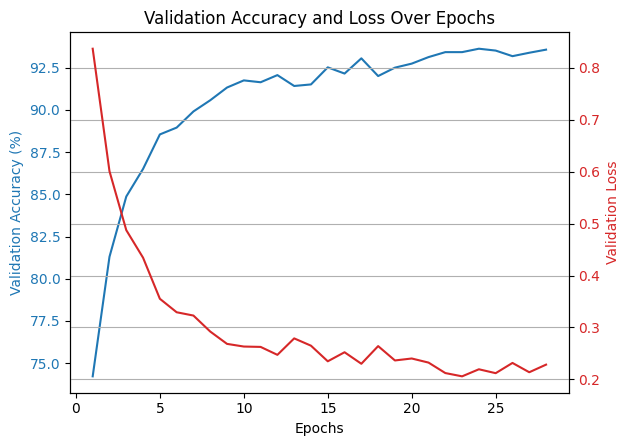

It took 3 minutes and 55 seconds to traing the model
Modello su 32 image_size su 2 layer e 8 iniziali, tempo in secondi 235.13, accuracy del 0.936 in 27 epoch



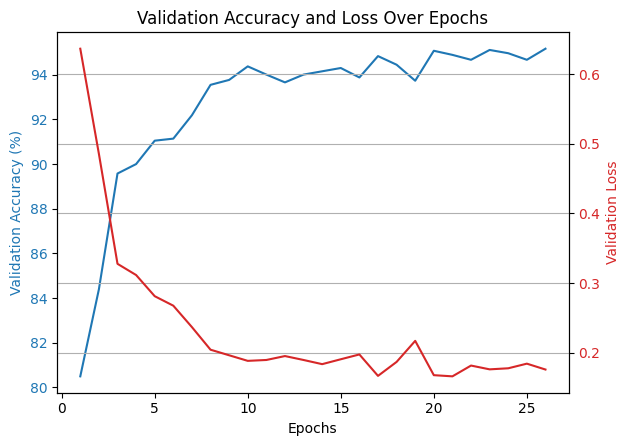

It took 3 minutes and 39 seconds to traing the model
Modello su 32 image_size su 2 layer e 16 iniziali, tempo in secondi 219.42, accuracy del 0.952 in 25 epoch



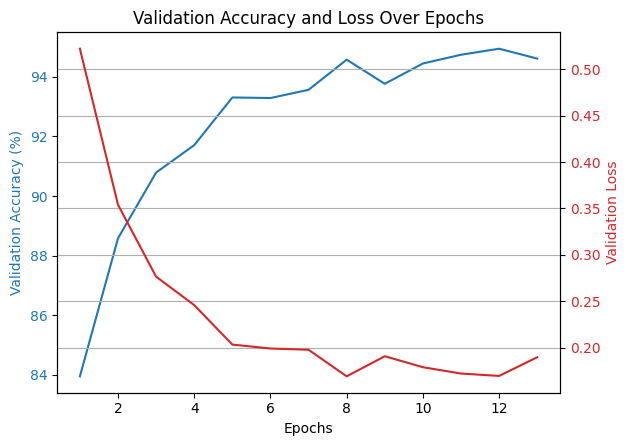

It took 1 minutes and 55 seconds to traing the model
Modello su 32 image_size su 2 layer e 32 iniziali, tempo in secondi 115.56, accuracy del 0.946 in 12 epoch



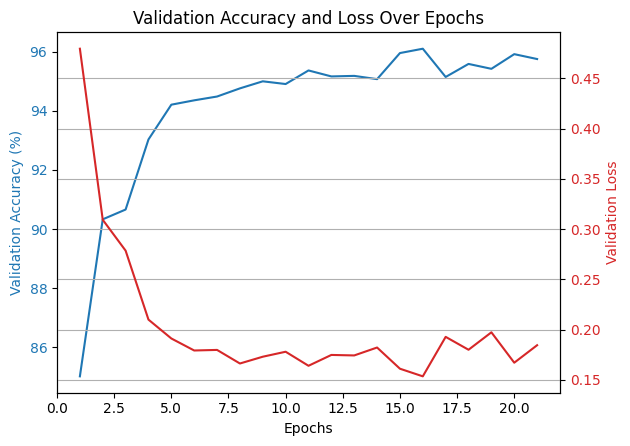

It took 3 minutes and 8 seconds to traing the model
Modello su 32 image_size su 2 layer e 64 iniziali, tempo in secondi 188.37, accuracy del 0.958 in 20 epoch



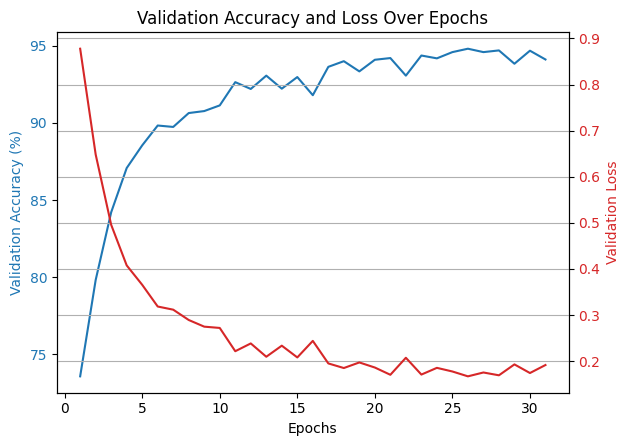

It took 4 minutes and 34 seconds to traing the model
Modello su 32 image_size su 3 layer e 8 iniziali, tempo in secondi 274.16, accuracy del 0.941 in 30 epoch



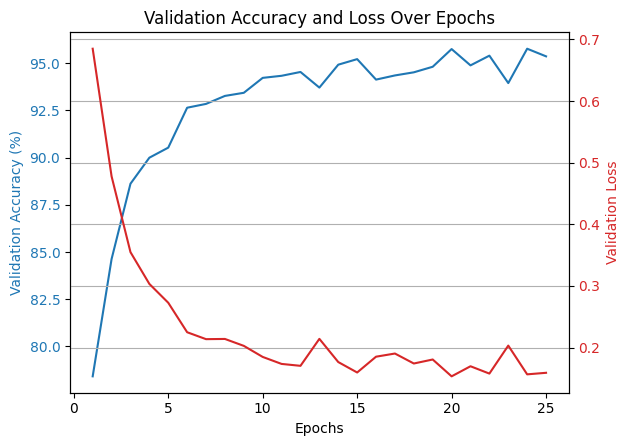

It took 3 minutes and 42 seconds to traing the model
Modello su 32 image_size su 3 layer e 16 iniziali, tempo in secondi 222.27, accuracy del 0.954 in 24 epoch



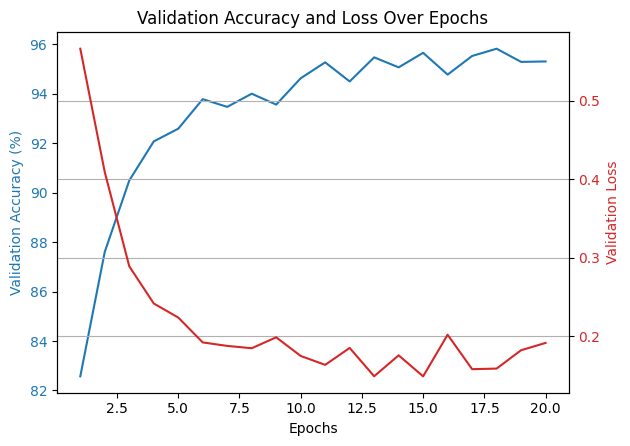

It took 2 minutes and 57 seconds to traing the model
Modello su 32 image_size su 3 layer e 32 iniziali, tempo in secondi 177.02, accuracy del 0.953 in 19 epoch



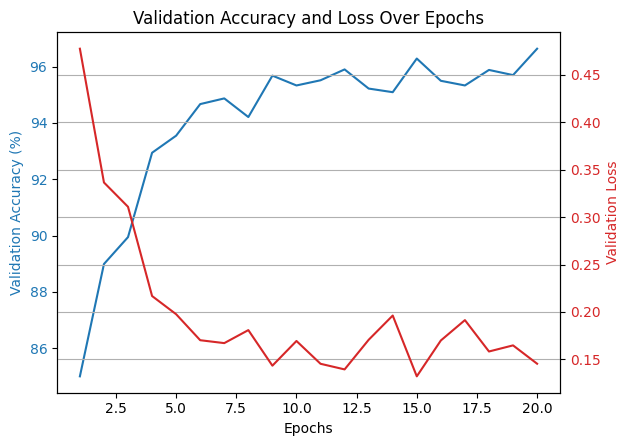

It took 3 minutes and 4 seconds to traing the model
Modello su 32 image_size su 3 layer e 64 iniziali, tempo in secondi 184.03, accuracy del 0.966 in 19 epoch



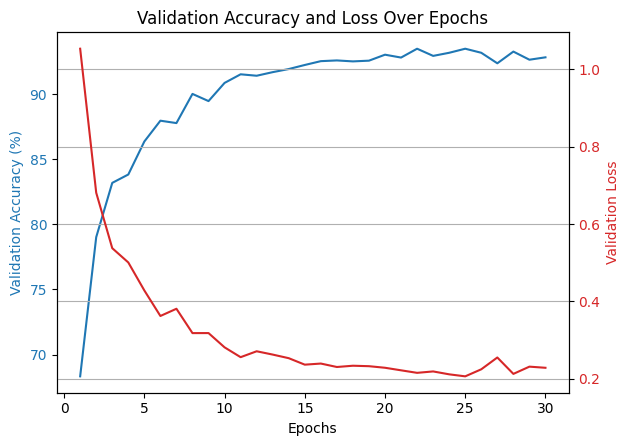

It took 4 minutes and 29 seconds to traing the model
Modello su 32 image_size su 4 layer e 8 iniziali, tempo in secondi 269.05, accuracy del 0.928 in 29 epoch



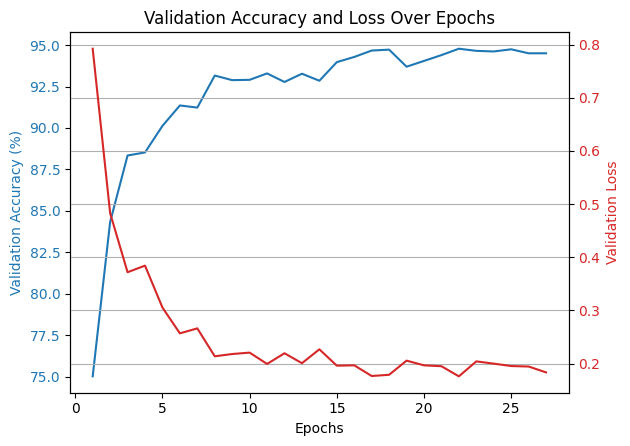

It took 4 minutes and 3 seconds to traing the model
Modello su 32 image_size su 4 layer e 16 iniziali, tempo in secondi 243.17, accuracy del 0.945 in 26 epoch



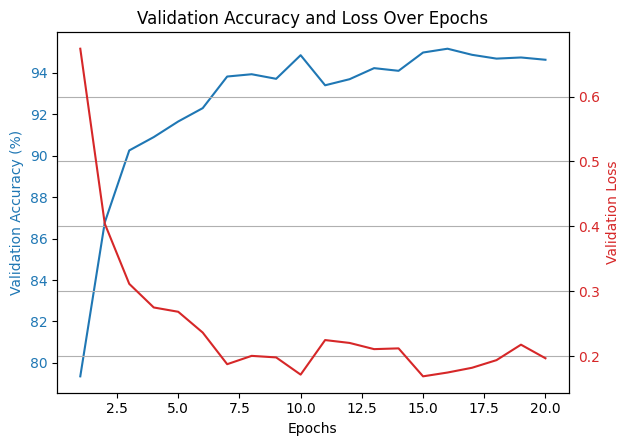

It took 3 minutes and 5 seconds to traing the model
Modello su 32 image_size su 4 layer e 32 iniziali, tempo in secondi 185.8, accuracy del 0.946 in 19 epoch



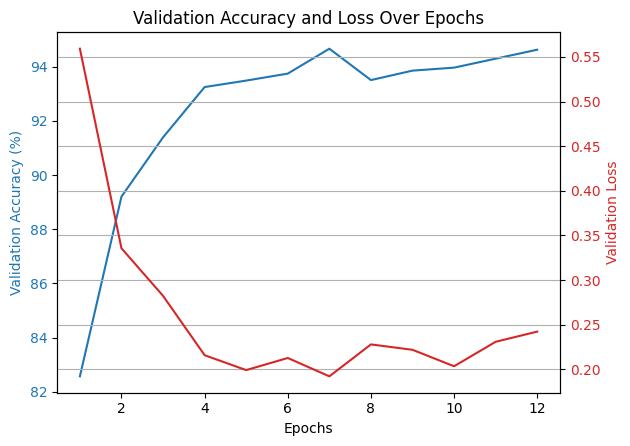

It took 1 minutes and 54 seconds to traing the model
Modello su 32 image_size su 4 layer e 64 iniziali, tempo in secondi 114.15, accuracy del 0.946 in 11 epoch



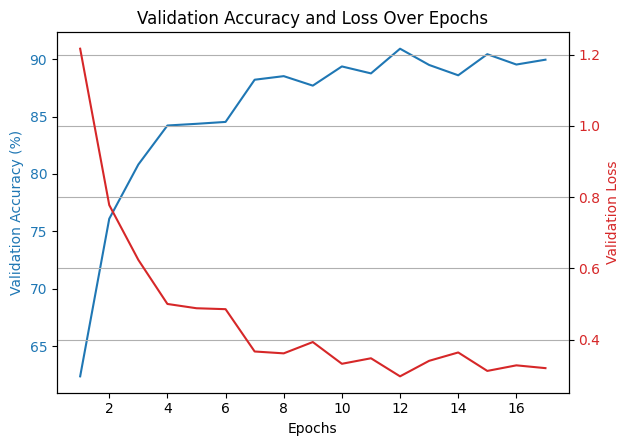

It took 2 minutes and 35 seconds to traing the model
Modello su 32 image_size su 5 layer e 8 iniziali, tempo in secondi 155.54, accuracy del 0.9 in 16 epoch



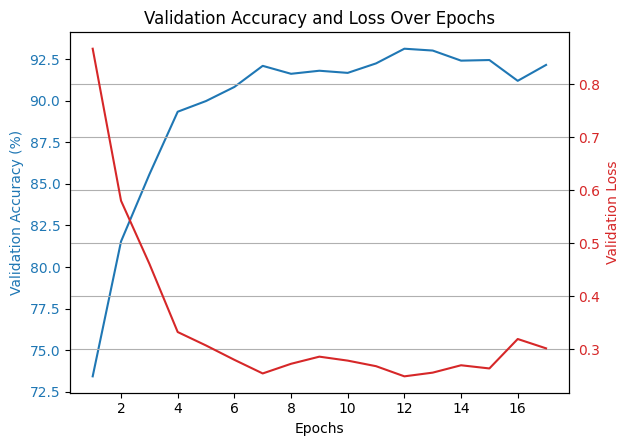

It took 2 minutes and 38 seconds to traing the model
Modello su 32 image_size su 5 layer e 16 iniziali, tempo in secondi 158.23, accuracy del 0.921 in 16 epoch



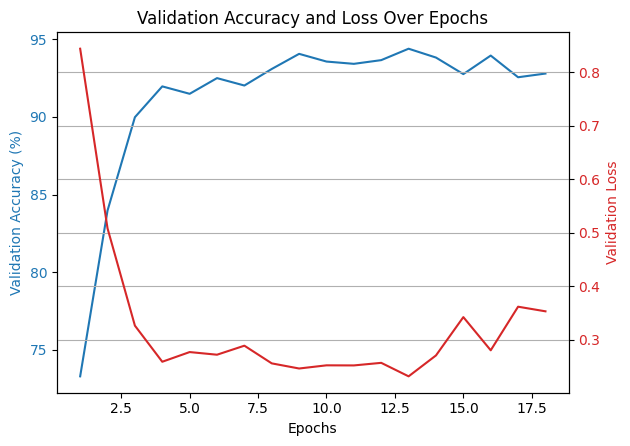

It took 2 minutes and 50 seconds to traing the model
Modello su 32 image_size su 5 layer e 32 iniziali, tempo in secondi 170.97, accuracy del 0.928 in 17 epoch



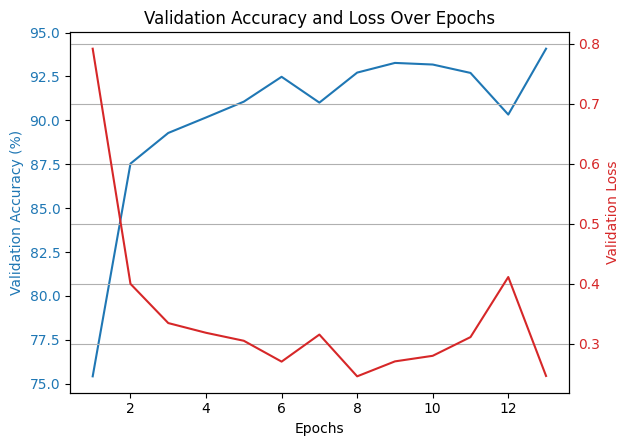

It took 2 minutes and 4 seconds to traing the model
Modello su 32 image_size su 5 layer e 64 iniziali, tempo in secondi 124.09, accuracy del 0.941 in 12 epoch



In [97]:
# Carica i risultati dal file
with open('complete_results.pkl', 'rb') as f:
    loaded_results = pickle.load(f)


for result in loaded_results:
    plot_training_epochs_hystory(result['val_accuracies'], result['val_losses'], result['n_epochs'])

    minutes = result['time_elapsed'] // 60
    seconds = result['time_elapsed'] - minutes * 60

    print(f"It took {int(minutes)} minutes and {int(seconds)} seconds to traing the model")
    print(f"Modello su {result['image_size']} image_size su {result['num_layers']} layer e {result['first_layer_filters']} iniziali, tempo in secondi {round(result['time_elapsed'], 2)}, accuracy del {round(result['classification_report']['accuracy'], 3)} in {result['n_epochs']} epoch")
    print()

BEST COMBINATION image_size = 32, n_layers = 3 e 64 iniziali, TEST SU DIFFERENTI DIMENSIONI DELLE IMMAGINI

In [94]:
from itertools import product

# Parametri da testare
image_sizes = [32, 64, 128, 256]
layers = [3]
first_layer_filters = [64]

# Combinazioni di parametri
parameter_combinations = list(product(image_sizes, layers, first_layer_filters))

results_image_size = []  # Per salvare i risultati

for image_size, num_layers, first_layer_filters in parameter_combinations:
    
    print(f"\n\n--Testing configuration: image_size={image_size}, layers={num_layers}, first_layer_filters={first_layer_filters}")
    
    train_loader, val_loader, test_loader, class_names = load_data(image_size)

    model = SimpleCNN(num_classes, image_size, num_layers, first_layer_filters).to(device)  # Move model to device

    val_accuracies, val_losses, time_elapsed, n_epochs = train_model(model, num_classes, train_loader, val_loader, epoch = 50)

    # Valuta il modello
    cm, report = evaluate_model(model, val_loader, class_names)

    # Salva i risultati
    results_image_size.append({
        "image_size": image_size,
        "num_layers": num_layers,
        "first_layer_filters": first_layer_filters,
        "val_accuracies": val_accuracies,
        "val_losses": val_losses,
        "time_elapsed": time_elapsed,
        "n_epochs": n_epochs,
        "confusion_matrix": cm,
        "classification_report": report
    })



--Testing configuration: image_size=32, layers=3, first_layer_filters=64


Epoch 1/50: 100%|██████████| 1358/1358 [00:10<00:00, 125.46batch/s, loss=0.579]

Epoch 1, Average Loss: 1.1600


Validation Accuracy: 83.16%
Validation Loss: 0.5194


Epoch 2/50: 100%|██████████| 1358/1358 [00:08<00:00, 166.96batch/s, loss=0.491] 

Epoch 2, Average Loss: 0.5050


Validation Accuracy: 90.00%
Validation Loss: 0.3172


Epoch 3/50: 100%|██████████| 1358/1358 [00:08<00:00, 165.09batch/s, loss=0.105] 

Epoch 3, Average Loss: 0.3515


Validation Accuracy: 90.97%
Validation Loss: 0.2752


Epoch 4/50: 100%|██████████| 1358/1358 [00:08<00:00, 163.84batch/s, loss=0.384] 

Epoch 4, Average Loss: 0.2707


Validation Accuracy: 92.31%
Validation Loss: 0.2310


Epoch 5/50: 100%|██████████| 1358/1358 [00:08<00:00, 165.32batch/s, loss=0.354] 

Epoch 5, Average Loss: 0.2232


Validation Accuracy: 93.60%
Validation Loss: 0.2051


Epoch 6/50: 100%|██████████| 1358/1358 [00:08<00:00, 168.32batch/s, loss=0.294]  

Epoch 6, Average Loss: 0.1915


Validation Accuracy: 93.64%
Validation Loss: 0.1920


Epoch 7/50: 100%|██████████| 1358/1358 [00:08<00:00, 167.79batch/s, loss=0.0773] 


Epoch 7, Average Loss: 0.1737
Validation Accuracy: 94.37%
Validation Loss: 0.1867


Epoch 8/50: 100%|██████████| 1358/1358 [00:08<00:00, 164.18batch/s, loss=0.0946] 

Epoch 8, Average Loss: 0.1515


Validation Accuracy: 95.16%
Validation Loss: 0.1589


Epoch 9/50: 100%|██████████| 1358/1358 [00:08<00:00, 165.65batch/s, loss=0.0529] 

Epoch 9, Average Loss: 0.1400


Validation Accuracy: 94.43%
Validation Loss: 0.1910


Epoch 10/50: 100%|██████████| 1358/1358 [00:08<00:00, 168.39batch/s, loss=0.237]  

Epoch 10, Average Loss: 0.1254


Validation Accuracy: 94.94%
Validation Loss: 0.1646


Epoch 11/50: 100%|██████████| 1358/1358 [00:08<00:00, 165.28batch/s, loss=0.235]  

Epoch 11, Average Loss: 0.1158


Validation Accuracy: 95.04%
Validation Loss: 0.1797


Epoch 12/50: 100%|██████████| 1358/1358 [00:08<00:00, 165.38batch/s, loss=0.229]   

Epoch 12, Average Loss: 0.1135


Validation Accuracy: 95.22%
Validation Loss: 0.1722


Epoch 13/50: 100%|██████████| 1358/1358 [00:08<00:00, 167.46batch/s, loss=0.314]   

Epoch 13, Average Loss: 0.1056


Validation Accuracy: 95.88%
Validation Loss: 0.1539


Epoch 14/50: 100%|██████████| 1358/1358 [00:08<00:00, 168.12batch/s, loss=0.0166]  

Epoch 14, Average Loss: 0.1034


Validation Accuracy: 95.33%
Validation Loss: 0.1627


Epoch 15/50: 100%|██████████| 1358/1358 [00:08<00:00, 164.86batch/s, loss=0.0377]  

Epoch 15, Average Loss: 0.0908


Validation Accuracy: 95.90%
Validation Loss: 0.1701


Epoch 16/50: 100%|██████████| 1358/1358 [00:08<00:00, 163.82batch/s, loss=0.000273]

Epoch 16, Average Loss: 0.0925


Validation Accuracy: 95.59%
Validation Loss: 0.1815


Epoch 17/50: 100%|██████████| 1358/1358 [00:08<00:00, 165.93batch/s, loss=0.154]   


Epoch 17, Average Loss: 0.0911
Validation Accuracy: 95.04%
Validation Loss: 0.1938


Epoch 18/50: 100%|██████████| 1358/1358 [00:08<00:00, 165.54batch/s, loss=0.0133]  

Epoch 18, Average Loss: 0.0851


Validation Accuracy: 95.48%
Validation Loss: 0.1791
Early stopping triggered after 18 epochs.


--Testing configuration: image_size=64, layers=3, first_layer_filters=64


Epoch 1/50: 100%|██████████| 1358/1358 [00:15<00:00, 87.07batch/s, loss=0.781]


Epoch 1, Average Loss: 1.0274
Validation Accuracy: 88.38%
Validation Loss: 0.3638


Epoch 2/50: 100%|██████████| 1358/1358 [00:15<00:00, 90.38batch/s, loss=0.286] 

Epoch 2, Average Loss: 0.4178


Validation Accuracy: 92.61%
Validation Loss: 0.2431


Epoch 3/50: 100%|██████████| 1358/1358 [00:16<00:00, 84.59batch/s, loss=0.317] 

Epoch 3, Average Loss: 0.2761


Validation Accuracy: 93.36%
Validation Loss: 0.2120


Epoch 4/50: 100%|██████████| 1358/1358 [00:14<00:00, 93.53batch/s, loss=0.0787] 

Epoch 4, Average Loss: 0.2163


Validation Accuracy: 94.54%
Validation Loss: 0.1661


Epoch 5/50: 100%|██████████| 1358/1358 [00:15<00:00, 90.16batch/s, loss=0.302]  

Epoch 5, Average Loss: 0.1725


Validation Accuracy: 95.31%
Validation Loss: 0.1608


Epoch 6/50: 100%|██████████| 1358/1358 [00:15<00:00, 88.90batch/s, loss=0.0281] 

Epoch 6, Average Loss: 0.1542


Validation Accuracy: 95.35%
Validation Loss: 0.1445


Epoch 7/50: 100%|██████████| 1358/1358 [00:15<00:00, 90.12batch/s, loss=0.0882] 

Epoch 7, Average Loss: 0.1311


Validation Accuracy: 95.64%
Validation Loss: 0.1523


Epoch 8/50: 100%|██████████| 1358/1358 [00:15<00:00, 89.24batch/s, loss=0.00678] 

Epoch 8, Average Loss: 0.1176


Validation Accuracy: 95.77%
Validation Loss: 0.1495


Epoch 9/50: 100%|██████████| 1358/1358 [00:15<00:00, 89.20batch/s, loss=0.00163] 

Epoch 9, Average Loss: 0.1042


Validation Accuracy: 95.11%
Validation Loss: 0.1657


Epoch 10/50: 100%|██████████| 1358/1358 [00:15<00:00, 89.79batch/s, loss=0.0323]  

Epoch 10, Average Loss: 0.1026


Validation Accuracy: 95.77%
Validation Loss: 0.1738


Epoch 11/50: 100%|██████████| 1358/1358 [00:15<00:00, 89.09batch/s, loss=0.0428]  

Epoch 11, Average Loss: 0.0879


Validation Accuracy: 94.96%
Validation Loss: 0.1940
Early stopping triggered after 11 epochs.


--Testing configuration: image_size=128, layers=3, first_layer_filters=64


Epoch 1/50: 100%|██████████| 1358/1358 [00:51<00:00, 26.41batch/s, loss=0.609]

Epoch 1, Average Loss: 0.9219


Validation Accuracy: 88.99%
Validation Loss: 0.3357


Epoch 2/50: 100%|██████████| 1358/1358 [00:50<00:00, 26.72batch/s, loss=0.1]   

Epoch 2, Average Loss: 0.3741


Validation Accuracy: 92.66%
Validation Loss: 0.2235


Epoch 3/50: 100%|██████████| 1358/1358 [00:52<00:00, 25.85batch/s, loss=0.234]  

Epoch 3, Average Loss: 0.2494


Validation Accuracy: 93.47%
Validation Loss: 0.2003


Epoch 4/50: 100%|██████████| 1358/1358 [00:51<00:00, 26.56batch/s, loss=0.104]  

Epoch 4, Average Loss: 0.1830


Validation Accuracy: 94.23%
Validation Loss: 0.1844


Epoch 5/50: 100%|██████████| 1358/1358 [00:50<00:00, 26.85batch/s, loss=0.142]  

Epoch 5, Average Loss: 0.1475


Validation Accuracy: 94.26%
Validation Loss: 0.1853


Epoch 6/50: 100%|██████████| 1358/1358 [00:50<00:00, 26.79batch/s, loss=0.0249] 

Epoch 6, Average Loss: 0.1206


Validation Accuracy: 95.15%
Validation Loss: 0.1599


Epoch 7/50: 100%|██████████| 1358/1358 [00:50<00:00, 26.67batch/s, loss=0.171]   

Epoch 7, Average Loss: 0.1062


Validation Accuracy: 95.64%
Validation Loss: 0.1478


Epoch 8/50: 100%|██████████| 1358/1358 [00:50<00:00, 26.70batch/s, loss=0.0155]  

Epoch 8, Average Loss: 0.0964


Validation Accuracy: 95.42%
Validation Loss: 0.1614


Epoch 9/50: 100%|██████████| 1358/1358 [00:51<00:00, 26.24batch/s, loss=0.000134]

Epoch 9, Average Loss: 0.0945


Validation Accuracy: 95.72%
Validation Loss: 0.1553


Epoch 10/50: 100%|██████████| 1358/1358 [00:51<00:00, 26.26batch/s, loss=0.00344] 

Epoch 10, Average Loss: 0.0762


Validation Accuracy: 95.62%
Validation Loss: 0.1646


Epoch 11/50: 100%|██████████| 1358/1358 [00:50<00:00, 26.96batch/s, loss=0.00435] 

Epoch 11, Average Loss: 0.0786


Validation Accuracy: 96.07%
Validation Loss: 0.1650


Epoch 12/50: 100%|██████████| 1358/1358 [00:51<00:00, 26.47batch/s, loss=0.0411]  

Epoch 12, Average Loss: 0.0682


Validation Accuracy: 96.36%
Validation Loss: 0.1587
Early stopping triggered after 12 epochs.


--Testing configuration: image_size=256, layers=3, first_layer_filters=64


Epoch 1/50: 100%|██████████| 1358/1358 [02:24<00:00,  9.42batch/s, loss=0.428]

Epoch 1, Average Loss: 1.2225


Validation Accuracy: 86.08%
Validation Loss: 0.4682


Epoch 2/50: 100%|██████████| 1358/1358 [02:21<00:00,  9.58batch/s, loss=0.326] 

Epoch 2, Average Loss: 0.4948


Validation Accuracy: 90.31%
Validation Loss: 0.3204


Epoch 3/50: 100%|██████████| 1358/1358 [02:21<00:00,  9.58batch/s, loss=0.25]  

Epoch 3, Average Loss: 0.3278


Validation Accuracy: 91.82%
Validation Loss: 0.2576


Epoch 4/50: 100%|██████████| 1358/1358 [02:22<00:00,  9.54batch/s, loss=0.171]  

Epoch 4, Average Loss: 0.2387


Validation Accuracy: 93.14%
Validation Loss: 0.2173


Epoch 5/50: 100%|██████████| 1358/1358 [02:23<00:00,  9.43batch/s, loss=0.0979]

Epoch 5, Average Loss: 0.1832


Validation Accuracy: 93.75%
Validation Loss: 0.2053


Epoch 6/50: 100%|██████████| 1358/1358 [02:22<00:00,  9.52batch/s, loss=0.212]  

Epoch 6, Average Loss: 0.1444


Validation Accuracy: 93.77%
Validation Loss: 0.2113


Epoch 7/50: 100%|██████████| 1358/1358 [02:23<00:00,  9.48batch/s, loss=0.0328] 

Epoch 7, Average Loss: 0.1248


Validation Accuracy: 93.55%
Validation Loss: 0.2276


Epoch 8/50: 100%|██████████| 1358/1358 [02:21<00:00,  9.60batch/s, loss=0.133]   

Epoch 8, Average Loss: 0.1149


Validation Accuracy: 94.01%
Validation Loss: 0.2281


Epoch 9/50: 100%|██████████| 1358/1358 [02:21<00:00,  9.56batch/s, loss=0.0819]  

Epoch 9, Average Loss: 0.0998


Validation Accuracy: 93.68%
Validation Loss: 0.2444


Epoch 10/50: 100%|██████████| 1358/1358 [02:22<00:00,  9.53batch/s, loss=0.00345] 

Epoch 10, Average Loss: 0.0924


Validation Accuracy: 93.88%
Validation Loss: 0.2794
Early stopping triggered after 10 epochs.


Save results

In [95]:
import pickle

# Salva su file binario
with open('results_image_size.pkl', 'wb') as f:
    pickle.dump(results_image_size, f)

Image Size test results analysis

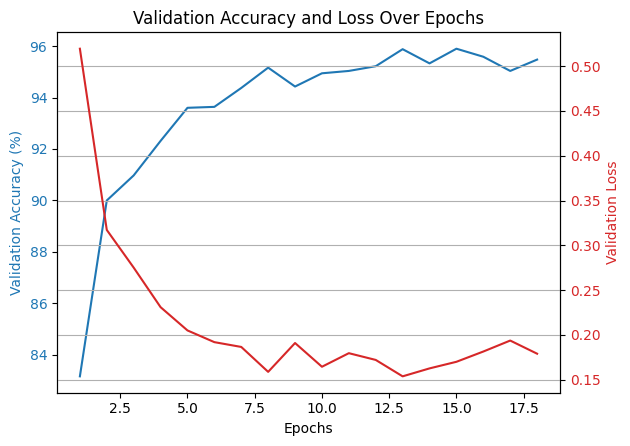

It took 2 minutes and 48 seconds to traing the model
Modello su 32 image_size su 3 layer e 64 iniziali, tempo in secondi 168.71, accuracy del 0.955 in 17 epoch



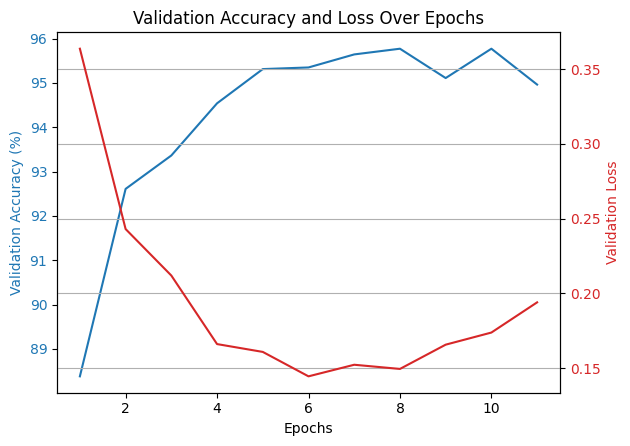

It took 3 minutes and 0 seconds to traing the model
Modello su 64 image_size su 3 layer e 64 iniziali, tempo in secondi 180.86, accuracy del 0.95 in 10 epoch



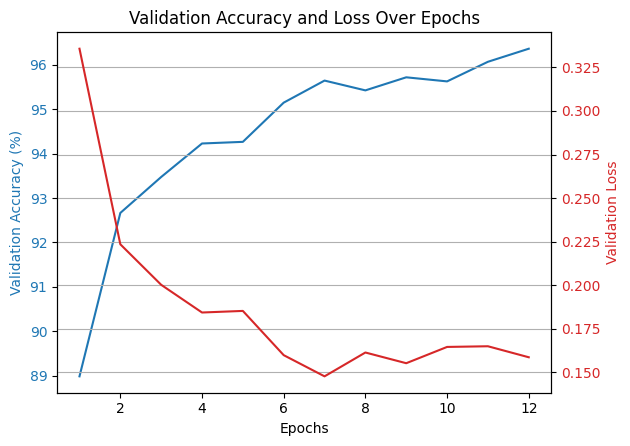

It took 10 minutes and 54 seconds to traing the model
Modello su 128 image_size su 3 layer e 64 iniziali, tempo in secondi 654.45, accuracy del 0.964 in 11 epoch



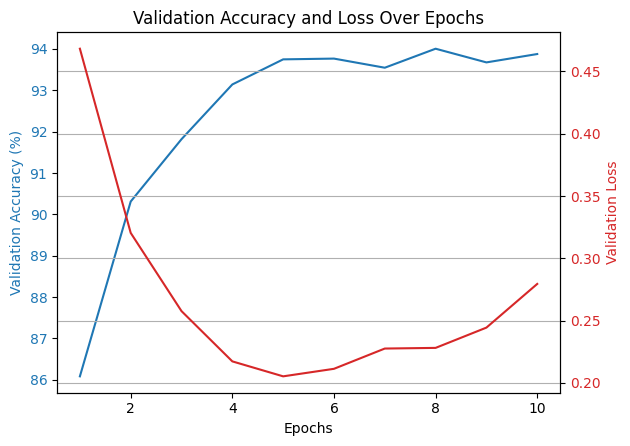

It took 24 minutes and 53 seconds to traing the model
Modello su 256 image_size su 3 layer e 64 iniziali, tempo in secondi 1493.44, accuracy del 0.939 in 9 epoch



In [96]:
# Carica i risultati dal file
with open('results_image_size.pkl', 'rb') as f:
    loaded_results = pickle.load(f)


for result in loaded_results:
    plot_training_epochs_hystory(result['val_accuracies'], result['val_losses'], result['n_epochs'])

    minutes = result['time_elapsed'] // 60
    seconds = result['time_elapsed'] - minutes * 60

    print(f"It took {int(minutes)} minutes and {int(seconds)} seconds to traing the model")
    print(f"Modello su {result['image_size']} image_size su {result['num_layers']} layer e {result['first_layer_filters']} iniziali, tempo in secondi {round(result['time_elapsed'], 2)}, accuracy del {round(result['classification_report']['accuracy'], 3)} in {result['n_epochs']} epoch")
    print()
    

## **Model trained on downscaled images vs fullscaled**

In [ ]:
model = load_model('plant_disease_model_32_3layer_32initial.pth', num_classes, image_width=32, num_layers=3, first_layer_filters=32)
train_loader, val_loader, test_loader, class_names = load_data(32)

_, report = evaluate_model(model, test_loader, class_names)

f1 = report['weighted avg']['f1-score']

print(f"F1 Score with downscaled images (32x32): {f1:.4f}")

F1 Score with downscaled images (32x32): 0.9602


In [31]:
model = load_model('plant_disease_model_256_3layer_32initial.pth', num_classes, image_width=256, num_layers=3, first_layer_filters=32)
train_loader, val_loader, test_loader, class_names = load_data(256)

_, report = evaluate_model(model, test_loader, class_names)
f1 = report['weighted avg']['f1-score']

print(f"F1 Score with original images: {f1}")

F1 Score with original images: 0.954450212756487


## **Analysis of mismatched classes**

In [21]:
statistics = collect_misclassified_images(model, test_loader, 'wrong_predictions_images', device)

Class-wise statistics:
Class 0: Total=63, Misclassified=6, Error Rate=9.52%
Class 1: Total=62, Misclassified=2, Error Rate=3.23%
Class 2: Total=27, Misclassified=5, Error Rate=18.52%
Class 3: Total=164, Misclassified=10, Error Rate=6.10%
Class 4: Total=150, Misclassified=4, Error Rate=2.67%
Class 5: Total=105, Misclassified=2, Error Rate=1.90%
Class 6: Total=85, Misclassified=1, Error Rate=1.18%
Class 7: Total=51, Misclassified=10, Error Rate=19.61%
Class 8: Total=119, Misclassified=2, Error Rate=1.68%
Class 9: Total=98, Misclassified=5, Error Rate=5.10%
Class 10: Total=116, Misclassified=0, Error Rate=0.00%
Class 11: Total=118, Misclassified=9, Error Rate=7.63%
Class 12: Total=138, Misclassified=10, Error Rate=7.25%
Class 13: Total=107, Misclassified=2, Error Rate=1.87%
Class 14: Total=42, Misclassified=0, Error Rate=0.00%
Class 15: Total=551, Misclassified=7, Error Rate=1.27%
Class 16: Total=229, Misclassified=6, Error Rate=2.62%
Class 17: Total=36, Misclassified=0, Error Rate=0.00%


In [69]:
list_of_percentage = []

for key, total, miss in [(key, statistics['total_counts'][key], statistics['misclassified_counts'][key]) for key in statistics['total_counts'] if key in statistics['misclassified_counts']]:
    percentage = int(miss / total * 100) if total > 0 else 0
    list_of_percentage.append((key, percentage))

sorted(list_of_percentage, key=lambda x: x[1], reverse=True)

[(7, 19),
 (2, 18),
 (29, 14),
 (21, 10),
 (0, 9),
 (30, 9),
 (32, 9),
 (34, 8),
 (11, 7),
 (12, 7),
 (18, 7),
 (3, 6),
 (22, 6),
 (28, 6),
 (31, 6),
 (9, 5),
 (26, 4),
 (33, 4),
 (1, 3),
 (20, 3),
 (4, 2),
 (16, 2),
 (19, 2),
 (23, 2),
 (24, 2),
 (35, 2),
 (36, 2),
 (5, 1),
 (6, 1),
 (8, 1),
 (13, 1),
 (15, 1),
 (37, 0)]

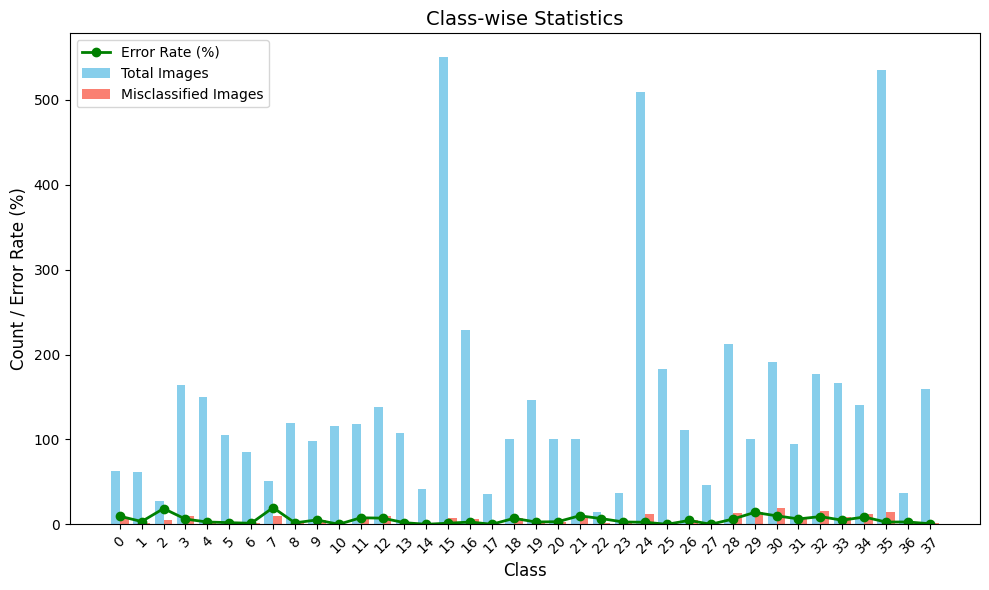

In [52]:
plot_class_statistics(statistics)

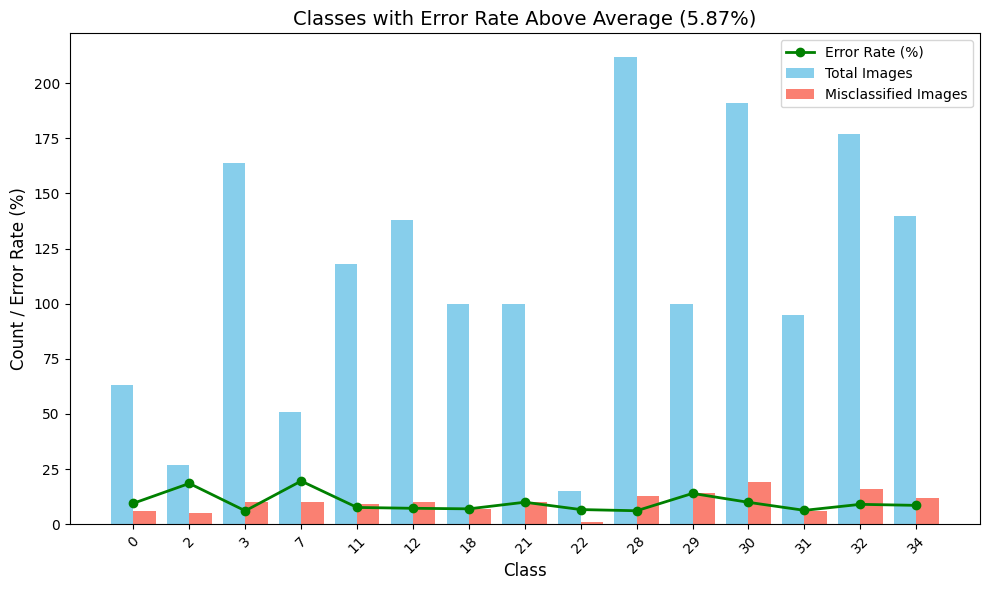

In [53]:
plot_high_error_classes(statistics)

## **Heat Map**

## **Multilabel test with missing classes**

## **Test on real Dataset**

In [24]:
import importlib
import model_fun
importlib.reload(model_fun); 

In [39]:
from model_fun import load_test_data
from torchvision import models
from torch import nn

### **1.Our Model**

In [31]:
test_loader, _ = load_test_data(32)

model = load_model('plant_disease_model_32_3layer_32initial.pth', num_classes, image_width=32, num_layers=3, first_layer_filters=32)

c:\Users\Leonardo\Desktop\FDS-Project\model_fun.py:250: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(file_path))


In [32]:
cm, report = evaluate_model(model, test_loader, class_names)

f1 = report['weighted avg']['f1-score']
accuracy = report['accuracy']

print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

F1 Score: 0.0899
Accuracy: 0.1111


c:\Users\Leonardo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Leonardo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Leonardo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### **2.ResNet**

In [42]:
test_loader, _ = load_test_data(224)

model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)
model.load_state_dict(torch.load('resNet_plant_disease_model.pth'))

c:\Users\Leonardo\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Leonardo\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\Leonardo\AppData\Local\Temp\ipykernel_21488\2414495537.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/ma

<All keys matched successfully>

In [46]:
cm, report = evaluate_model(model, test_loader, class_names)

f1 = report['weighted avg']['f1-score']
accuracy = report['accuracy']

print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

F1 Score: 0.2044
Accuracy: 0.2434


c:\Users\Leonardo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Leonardo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Leonardo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Future Goal**: try to improve score on real Dataset